In [1]:
Sys.setlocale("LC_ALL", 'Persian')

[1] "LC_COLLATE=Persian_Iran.1256;LC_CTYPE=Persian_Iran.1256;LC_MONETARY=Persian_Iran.1256;LC_NUMERIC=C;LC_TIME=Persian_Iran.1256"

In [2]:
options(scipen=999)

In [3]:
install.packages('leaps')

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Matility\AppData\Local\Temp\Rtmp4qBpFI\downloaded_packages


In [4]:
library(ggplot2)
library(glue)
library(psych)
library(jtools)
library(plyr)
library(dplyr)
library(usdm)
library(STAT)
# library(GGally)
library(car)
library(caret)
library(leaps)
library(forecast)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'glue' was built under R version 3.6.3"Warning message:
"package 'psych' was built under R version 3.6.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'jtools' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:glue':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'usdm' was built under R version 3.6.3"Loading required package: sp
Loading required package: raster

Attaching package: 'raster'

The fo

In [5]:
data = readxl::read_excel(path = 'E:\\Term 7\\Data Mining\\Ex2\\Regression\\Iran_Maskan_koll9904.xlsx')

In [6]:
head(data)

کد قرارداد,نوع قرارداد,استان,شهرستان,نوع ملک,منطقه شهرداری,نوع کاربری,مساحت,درصد,قیمت,قیمت یک مترمربع,عمر بنا,نوع اسکلت,تاریخ ثبت قرارداد,شش رقم نخست کد پستی
19136381,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,83.00,100,3000000,36144.58,15,فلزي,1399/04/14,456179
19140513,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,90.00,100,1080000,12000.00,9,فلزي,1399/04/15,456615
19192568,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,49.00,100,10000000,204081.63,10,بتوني,1399/04/23,456173
19202902,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.92,100,3240000,40039.55,9,فلزي,1399/04/24,456194
19203171,مبايعه نامه,زنجان,ابهر,دستگاه آپارتمان,NA,مسکوني,80.00,100,750000,9375.00,10,بتوني,1399/04/24,456618
19052240,مبايعه نامه,مرکزي,اراك,دستگاه آپارتمان,NA,مسکوني,100.00,100,5500000,55000.00,0,بتوني,1399/04/01,381333


In [7]:
str(data)

tibble [43,133 x 15] (S3: tbl_df/tbl/data.frame)
 $ کد قرارداد         : chr [1:43133] "19136381" "19140513" "19192568" "19202902" ...
 $ نوع قرارداد        : chr [1:43133] "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" "مبايعه نامه" ...
 $ استان              : chr [1:43133] "زنجان" "زنجان" "زنجان" "زنجان" ...
 $ شهرستان            : chr [1:43133] "ابهر" "ابهر" "ابهر" "ابهر" ...
 $ نوع ملک            : chr [1:43133] "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" "دستگاه آپارتمان" ...
 $ منطقه شهرداري      : num [1:43133] NA NA NA NA NA NA NA NA NA 4 ...
 $ نوع کاربري         : chr [1:43133] "مسکوني" "مسکوني" "مسکوني" "مسکوني" ...
 $ مساحت              : num [1:43133] 83 90 49 80.9 80 ...
 $ درصد               : chr [1:43133] "100" "100" "100" "100" ...
 $ قيمت               : num [1:43133] 3000000 1080000 10000000 3240000 750000 ...
 $ قيمت يک مترمربع    : chr [1:43133] "36144.58" "12000.00" "204081.63" "40039.55" ...
 $ عمر بنا            : num [1:43133] 15 9 10 9 10 0 1 6 19 0 ...


In [8]:
dim(data)

[1] 43133    15

In [9]:
names(data)[1] = 'contrat_number'
names(data)[2] = 'contract_type'
names(data)[3] = 'state'
names(data)[4] = 'city'
names(data)[5] = 'property_type'
names(data)[6] = 'district_number'
names(data)[7] = 'usage_type'
names(data)[8] = 'area'
names(data)[9] = 'percentage'
names(data)[10] = 'price'
names(data)[11] = 'price_per_square'
names(data)[12] = 'building_age'
names(data)[13] = 'skeleton_type'
names(data)[14] = 'contract_date'
names(data)[15] = 'postal_code'
data = data[!is.na(data$contrat_number),]
data$percentage = as.numeric(data$percentage)
data$price = ((as.numeric(data$price) / 10000) * data$percentage) / 100
data$price_per_square = as.numeric(data$price_per_square) / 10000

In [10]:
khoozestan = data[data$state == 'خوزستان',]

In [11]:
summary(khoozestan)

 contrat_number     contract_type         state               city          
 Length:768         Length:768         Length:768         Length:768        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 property_type      district_number   usage_type             area         
 Length:768         Min.   : 1.000   Length:768         Min.   :    1.00  
 Class :character   1st Qu.: 2.000   Class :character   1st Qu.:   76.15  
 Mode  :character   Median : 2.000   Mode  :character   Median :   90.00  
                    Mean   : 2.492                      Mean   :  323.55  
         

In [12]:
head(khoozestan)

contrat_number,contract_type,state,city,property_type,district_number,usage_type,area,percentage,price,price_per_square,building_age,skeleton_type,contract_date,postal_code
19048971,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,NA,مسکوني,75.00,100,195,2.600000,2,بدون اسکلت,1399/04/01,617563
19052727,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,2,مسکوني,96.30,100,735,7.632399,13,فلزي,1399/04/01,191181
19056655,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,8,مسکوني,111.60,100,585,5.241935,8,بتوني,1399/04/02,618493
19060434,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,4,مسکوني,13313.00,100,400,0.030046,11,فلزي,1399/04/02,613668
19061836,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,5,مسکوني,80.48,100,285,3.541252,11,بتوني و فلزي,1399/04/02,613495
19061854,مبايعه نامه,خوزستان,اهواز,دستگاه آپارتمان,3,مسکوني,72.22,100,500,6.923290,9,بتوني و فلزي,1399/04/02,617763


#### 1:contrat_number:no_use
#### 2:contract_type:all_same
#### 3:state:all_same
#### 5:property_type:all_same
#### 7:usage_type:all_same
#### 9:percentage:multiplied_in_price
#### 11:price_per_square:should not be used in prediction
#### 14:contract_date:no_use

In [13]:
khoozestan = khoozestan[-c(1,2,3,5,7,9,11,14)]

In [14]:
head(khoozestan)

city,district_number,area,price,building_age,skeleton_type,postal_code
اهواز,NA,75.00,195,2,بدون اسکلت,617563
اهواز,2,96.30,735,13,فلزي,191181
اهواز,8,111.60,585,8,بتوني,618493
اهواز,4,13313.00,400,11,فلزي,613668
اهواز,5,80.48,285,11,بتوني و فلزي,613495
اهواز,3,72.22,500,9,بتوني و فلزي,617763


In [15]:
summary(khoozestan)

     city           district_number       area              price          
 Length:768         Min.   : 1.000   Min.   :    1.00   Min.   :   0.0142  
 Class :character   1st Qu.: 2.000   1st Qu.:   76.15   1st Qu.: 230.5625  
 Mode  :character   Median : 2.000   Median :   90.00   Median : 338.0000  
                    Mean   : 2.492   Mean   :  323.55   Mean   : 404.2294  
                    3rd Qu.: 2.000   3rd Qu.:  110.00   3rd Qu.: 510.0000  
                    Max.   :22.000   Max.   :68085.00   Max.   :2255.0000  
                    NA's   :522                                            
  building_age   skeleton_type      postal_code       
 Min.   : 0.00   Length:768         Length:768        
 1st Qu.: 2.00   Class :character   Class :character  
 Median : 6.00   Mode  :character   Mode  :character  
 Mean   : 7.06                                        
 3rd Qu.: 9.00                                        
 Max.   :60.00                                        
       

#### 522 records out of 768 records have NA in district_number feature so we remove this column.

In [16]:
khoozestan = khoozestan[-c(2)]

In [17]:
khoozestan$city = mapvalues(khoozestan$city, 
          from=c('اهواز','ايذه','آبادان',unique(khoozestan$city)[4],'بندر ماهشهر','بهبهان','چمران','خرمشهر','دزفول','رامشير','شوش','شوشتر','شيبان','مسجد سليمان','هنديجان'), 
          to=c('ahvaz','izeh','abadan','bandare_emam_khomeini','bandare_mahshahr','behbahan','chamran',
               'khorramshahr','dezfool','raamshir','shoosh','shooshtar','shiban','masjed_soleiman','handijan'))

In [18]:
khoozestan$skeleton_type = mapvalues(khoozestan$skeleton_type, 
          from=c(unique(khoozestan$skeleton_type)[1],unique(khoozestan$skeleton_type)[2],unique(khoozestan$skeleton_type)[3],unique(khoozestan$skeleton_type)[4],unique(khoozestan$skeleton_type)[5],unique(khoozestan$skeleton_type)[6]), 
          to=c('none','metal','concrete','metal_concrete','brick_or_cement_block','adobe_or_clay'))

In [19]:
head(khoozestan)

city,area,price,building_age,skeleton_type,postal_code
ahvaz,75.00,195,2,none,617563
ahvaz,96.30,735,13,metal,191181
ahvaz,111.60,585,8,concrete,618493
ahvaz,13313.00,400,11,metal,613668
ahvaz,80.48,285,11,metal_concrete,613495
ahvaz,72.22,500,9,metal_concrete,617763


In [20]:
dim(khoozestan)

[1] 768   6

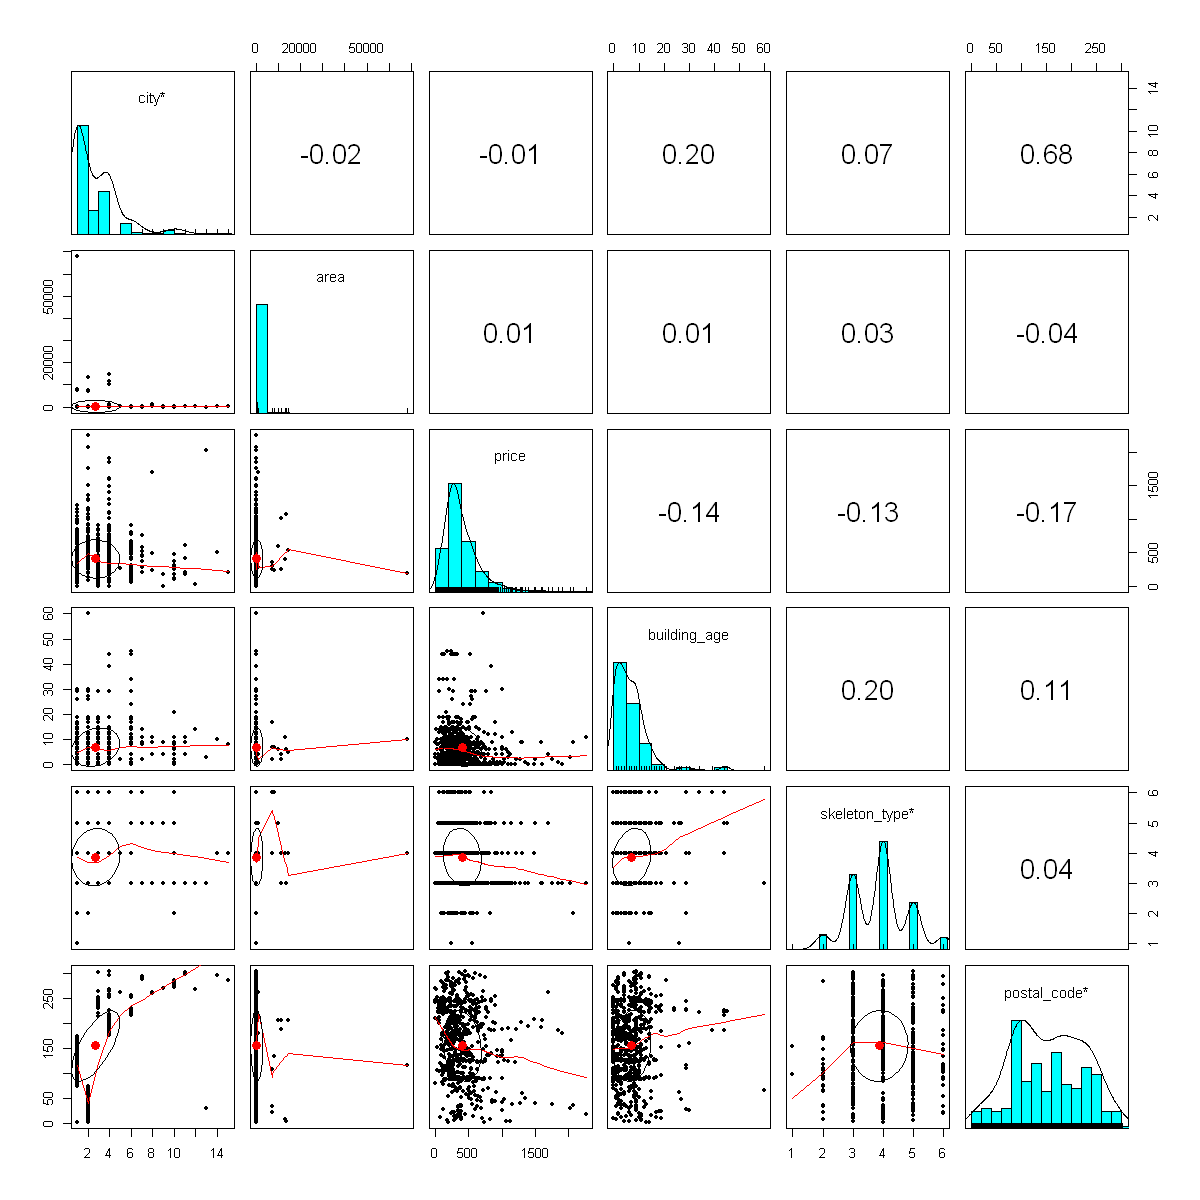

In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(khoozestan, col="red")

In [22]:
dummy_khoozestan = data.frame(predict(dummyVars(~.,khoozestan),khoozestan))

In [23]:
str(dummy_khoozestan)

'data.frame':	768 obs. of  327 variables:
 $ cityabadan                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityahvaz                         : num  1 1 1 1 1 1 1 1 1 1 ...
 $ citybandare_emam_khomeini         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybandare_mahshahr              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citybehbahan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citychamran                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citydezfool                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityhandijan                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityizeh                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citykhorramshahr                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ citymasjed_soleiman               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityraamshir                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshiban                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cityshoosh                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ cit

In [24]:
dim(dummy_khoozestan)

[1] 768 327

In [26]:
# dim(khoozestan)

In [28]:
set.seed(831)

train_index = sample.int(nrow(dummy_khoozestan), 0.8*nrow(dummy_khoozestan), replace=F)

train = dummy_khoozestan[train_index,]
validation = dummy_khoozestan[-train_index,-c(17)]
y_validation = dummy_khoozestan[-train_index,c(17)]

In [29]:
# y_train = dummy_khoozestan[train_index,c(17)]

In [30]:
dim(train)

[1] 614 327

In [33]:
dim(validation)

[1] 154 326

In [38]:
# options(repr.plot.width = 3, repr.plot.height = 3)
# ggplot(train , aes(x=area , y=price)) + geom_point()

In [39]:
# quantile(train$area , 0.98)

In [36]:
# quantile(train$area , 0.99)

In [37]:
# train = train[train$area < quantile(train$area , 0.98),]

In [38]:
# options(repr.plot.width = 3, repr.plot.height = 3)
# ggplot(train , aes(x=area , y=price)) + geom_point()

In [39]:
# options(repr.plot.width = 3, repr.plot.height = 3)
# ggplot(train , aes(x=sqrt(building_age) , y=log10(price))) + geom_point()

In [40]:
# options(repr.plot.width = 6, repr.plot.height = 3)
# ggplot(train , aes(x=price , y=city)) + geom_point()

In [41]:
# city_count <- train %>%
#     select(city) %>%
#     group_by(city) %>%
#     count() %>%
#     arrange(n)

In [42]:
# low_number_of_records = city_count[city_count$n < 10,]$city

In [43]:
# train = train[!train$city %in% low_number_of_records,]

In [44]:
# options(repr.plot.width = 6, repr.plot.height = 3)
# ggplot(train , aes(x=price , y=city)) + geom_point()

In [45]:
# options(repr.plot.width = 6, repr.plot.height = 3)
# ggplot(train , aes(x=price , y=skeleton_type)) + geom_point()

In [46]:
# train = train[train$skeleton_type != 'adobe_or_clay',]

In [47]:
# options(repr.plot.width = 6, repr.plot.height = 3)
# ggplot(train , aes(x=price , y=skeleton_type)) + geom_point()

In [48]:
# dim(train)

In [49]:
# 

# Simple Model With All Variables

In [40]:
all.reg <- lm(price ~ . ,data = train)
summary(all.reg)


Call:
lm(formula = price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-585.83  -55.53    0.00   39.27  677.86 

Coefficients: (52 not defined because of singularities)
                                       Estimate   Std. Error t value
(Intercept)                          585.263962   192.512673   3.040
cityabadan                          -316.446670   228.888150  -1.383
cityahvaz                           -360.375174   262.966522  -1.370
citybandare_emam_khomeini           -281.254004   305.746497  -0.920
citybandare_mahshahr                 -97.137213   263.428797  -0.369
citybehbahan                        -309.044892   261.936163  -1.180
citychamran                          147.516492   348.317048   0.424
citydezfool                         -182.799124   263.012696  -0.695
cityhandijan                        1093.766385   263.792126   4.146
cityizeh                            -376.009711   263.429289  -1.427
citykhorramshahr                    -234.5298

Warning message:
"not plotting observations with leverage one:
  7, 9, 10, 11, 13, 14, 19, 20, 21, 22, 32, 33, 42, 43, 57, 58, 61, 62, 65, 67, 70, 72, 74, 76, 77, 78, 81, 82, 83, 84, 86, 87, 89, 92, 93, 108, 109, 113, 116, 122, 124, 128, 130, 132, 134, 135, 139, 145, 149, 150, 159, 160, 163, 167, 182, 185, 188, 190, 192, 193, 197, 198, 206, 207, 211, 213, 214, 217, 232, 238, 245, 246, 247, 253, 255, 258, 261, 267, 284, 286, 290, 293, 298, 301, 310, 315, 325, 327, 331, 336, 339, 347, 348, 349, 351, 355, 356, 357, 360, 364, 369, 370, 374, 375, 378, 382, 384, 385, 386, 387, 390, 396, 397, 400, 406, 407, 416, 427, 430, 436, 440, 445, 448, 450, 451, 452, 453, 456, 458, 465, 468, 474, 475, 477, 478, 486, 487, 488, 489, 490, 491, 495, 496, 497, 502, 504, 505, 510, 512, 516, 526, 527, 530, 531, 535, 537, 538, 544, 546, 547, 552, 553, 561, 563, 568, 575, 576, 580, 581, 586, 587, 589, 597, 608, 610, 611"

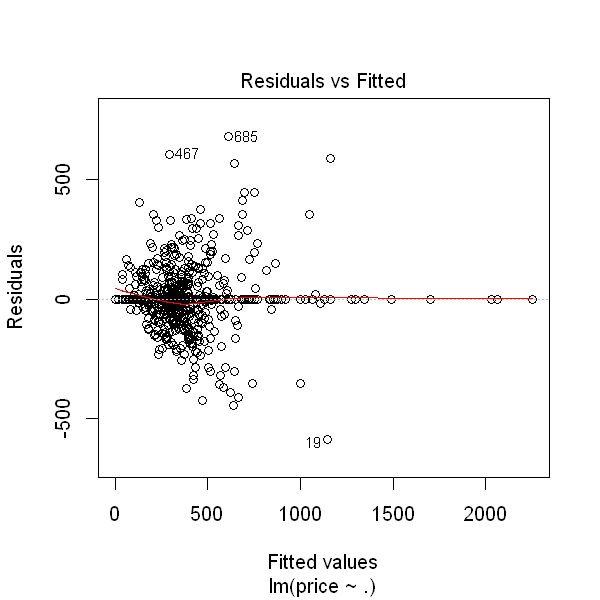

Warning message:
"not plotting observations with leverage one:
  7, 9, 10, 11, 13, 14, 19, 20, 21, 22, 32, 33, 42, 43, 57, 58, 61, 62, 65, 67, 70, 72, 74, 76, 77, 78, 81, 82, 83, 84, 86, 87, 89, 92, 93, 108, 109, 113, 116, 122, 124, 128, 130, 132, 134, 135, 139, 145, 149, 150, 159, 160, 163, 167, 182, 185, 188, 190, 192, 193, 197, 198, 206, 207, 211, 213, 214, 217, 232, 238, 245, 246, 247, 253, 255, 258, 261, 267, 284, 286, 290, 293, 298, 301, 310, 315, 325, 327, 331, 336, 339, 347, 348, 349, 351, 355, 356, 357, 360, 364, 369, 370, 374, 375, 378, 382, 384, 385, 386, 387, 390, 396, 397, 400, 406, 407, 416, 427, 430, 436, 440, 445, 448, 450, 451, 452, 453, 456, 458, 465, 468, 474, 475, 477, 478, 486, 487, 488, 489, 490, 491, 495, 496, 497, 502, 504, 505, 510, 512, 516, 526, 527, 530, 531, 535, 537, 538, 544, 546, 547, 552, 553, 561, 563, 568, 575, 576, 580, 581, 586, 587, 589, 597, 608, 610, 611"

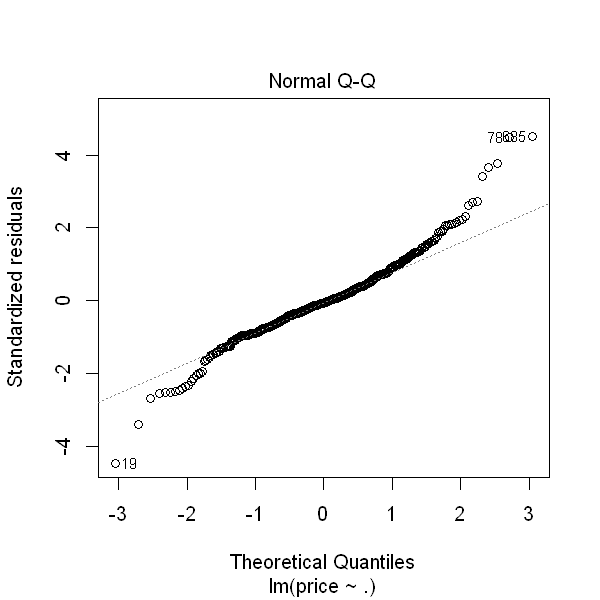

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

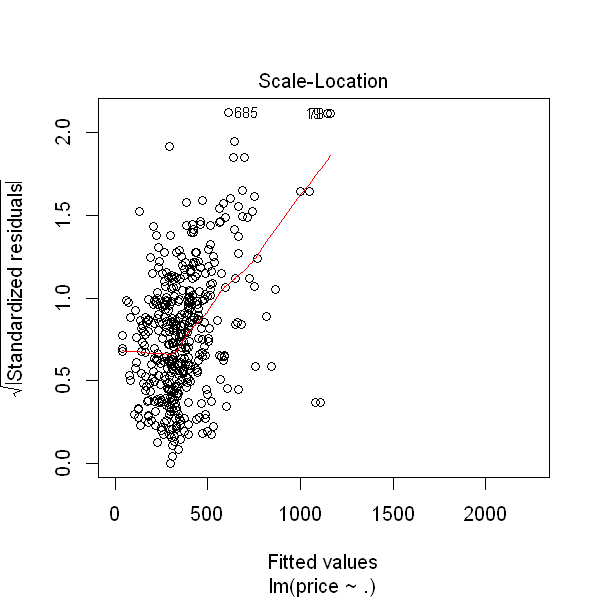

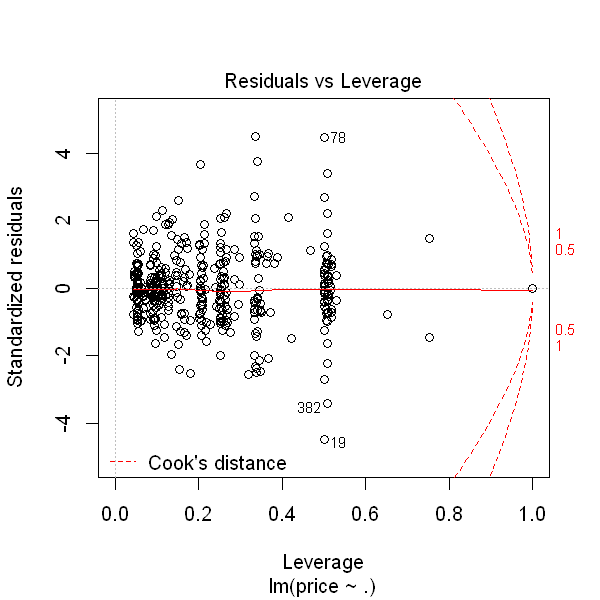

In [41]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg)

In [42]:
accuracy(all.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,-0.000000000000004703078,137.406,85.20685,-2683.718,2700.118,0.4397862


In [45]:
y_train_hat = predict(all.reg,train[-17])

Warning message in predict.lm(all.reg, train[-17]):
"prediction from a rank-deficient fit may be misleading"

In [46]:
train_residuals = train[,17] - y_train_hat

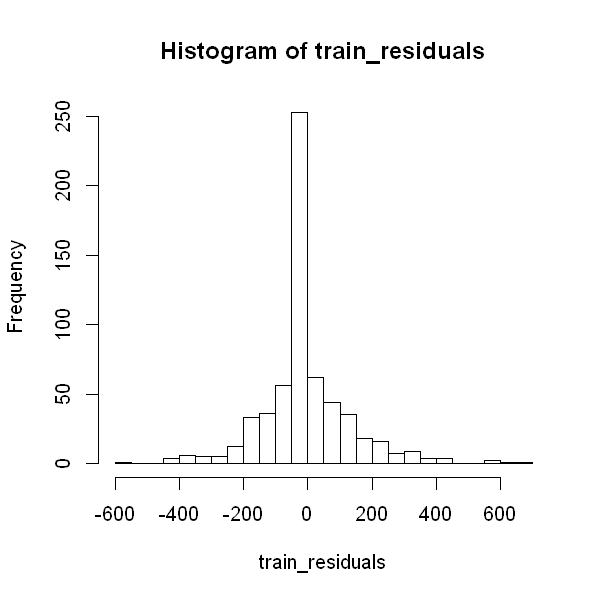

In [47]:
hist(train_residuals,breaks=40)

In [48]:
y_validation_hat = predict(all.reg,validation)

Warning message in predict.lm(all.reg, validation):
"prediction from a rank-deficient fit may be misleading"

In [49]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,71.29738,353.6341,225.9979,-9446.7,9494.791


In [50]:
validation_residuals = y_validation - y_validation_hat

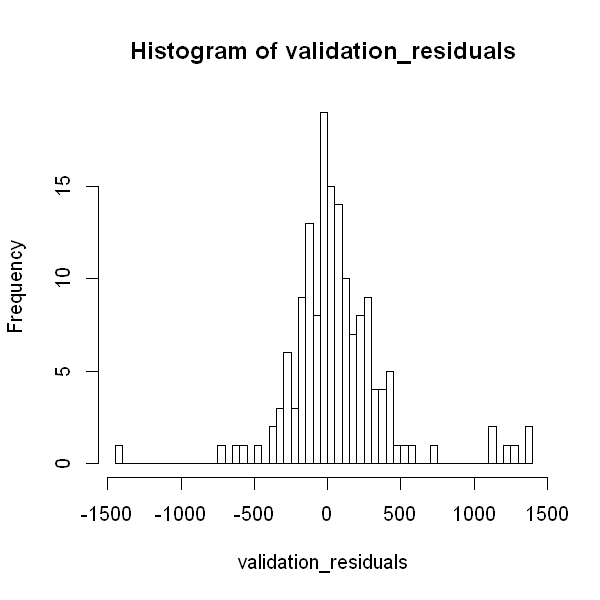

In [51]:
hist(validation_residuals,breaks=40)

In [52]:
# predict(all.reg,validation)

In [56]:
formula.all.variables <- formula(lm(price~.,train))

In [69]:
# formula.all.variables

In [58]:
forward.reg = step(lm(price ~ 1 ,data = train),direction='forward',scope=formula.all.variables)

Start:  AIC=6921.82
price ~ 1

                                     Df Sum of Sq      RSS    AIC
+ cityahvaz                           1   4907376 43253729 6857.8
+ postal_code613865                   1   3475012 44686094 6877.8
+ postal_code615568                   1   2792177 45368928 6887.2
+ cityshiban                          1   2686173 45474932 6888.6
+ postal_code614818                   1   2686173 45474932 6888.6
+ skeleton_typeconcrete               1   2325625 45835480 6893.4
+ postal_code635917                   1   1712658 46448447 6901.6
+ postal_code635190                   1   1206734 46954371 6908.2
+ postal_code615573                   1   1166979 46994127 6908.8
+ citybandare_emam_khomeini           1   1104383 47056722 6909.6
+ postal_code635165                   1    990575 47170530 6911.1
+ cityhandijan                        1    976527 47184578 6911.2
+ postal_code616464                   1    914699 47246407 6912.0
+ postal_code618397                   1    82

In [59]:
summary(forward.reg)


Call:
lm(formula = price ~ cityahvaz + cityshiban + postal_code613865 + 
    postal_code615568 + postal_code635917 + skeleton_typeconcrete + 
    postal_code635190 + citybandare_emam_khomeini + postal_code635165 + 
    postal_code635174 + postal_code631579 + postal_code631861 + 
    postal_code618397 + postal_code615573 + postal_code616464 + 
    postal_code631826 + postal_code631681 + postal_code615574 + 
    building_age + postal_code635713 + postal_code631683 + postal_code613682 + 
    postal_code614398 + postal_code615569 + postal_code613373 + 
    postal_code616463 + postal_code635471 + postal_code631787 + 
    postal_code613388 + postal_code635162 + postal_code631773 + 
    postal_code635184 + postal_code635164 + postal_code631978 + 
    postal_code639163 + postal_code635185 + postal_code631481 + 
    postal_code631876 + postal_code646185 + postal_code631591 + 
    cityraamshir + postal_code631775 + postal_code631687 + postal_code631685 + 
    postal_code635160 + postal_code6351

Warning message:
"not plotting observations with leverage one:
  11, 13, 14, 21, 22, 58, 62, 65, 67, 72, 76, 78, 81, 92, 113, 124, 130, 135, 139, 149, 150, 185, 188, 192, 206, 246, 253, 258, 261, 267, 286, 293, 315, 327, 347, 364, 369, 378, 385, 386, 397, 406, 416, 427, 430, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 504, 512, 516, 526, 527, 535, 537, 546, 552, 581, 608, 610"

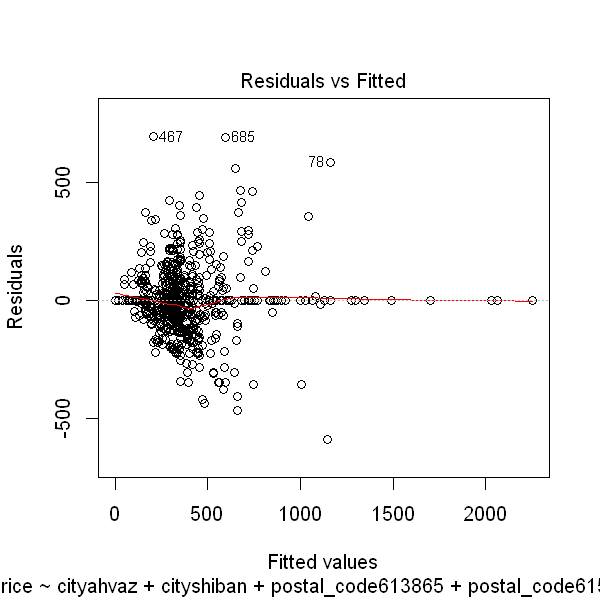

Warning message:
"not plotting observations with leverage one:
  11, 13, 14, 21, 22, 58, 62, 65, 67, 72, 76, 78, 81, 92, 113, 124, 130, 135, 139, 149, 150, 185, 188, 192, 206, 246, 253, 258, 261, 267, 286, 293, 315, 327, 347, 364, 369, 378, 385, 386, 397, 406, 416, 427, 430, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 504, 512, 516, 526, 527, 535, 537, 546, 552, 581, 608, 610"

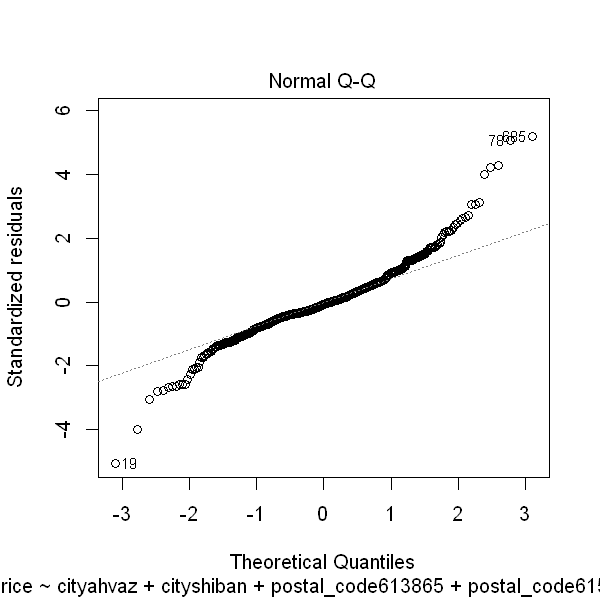

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

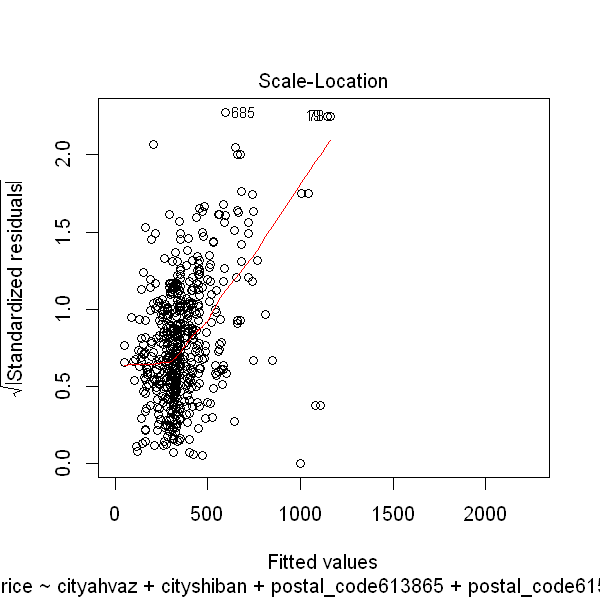

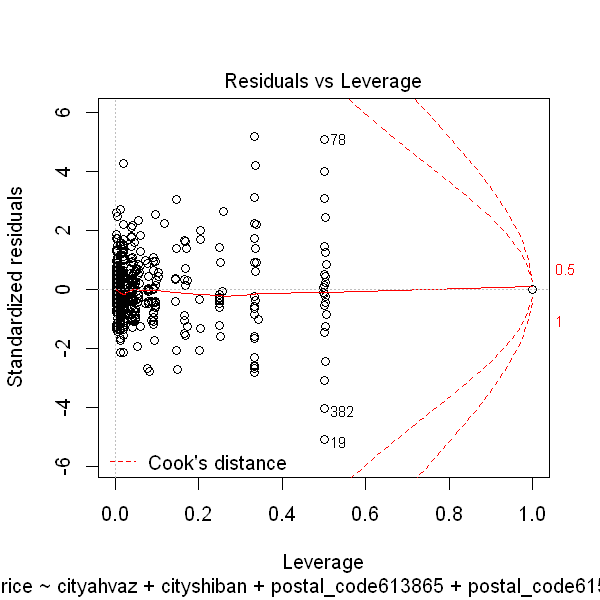

In [60]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(forward.reg)

In [61]:
accuracy(forward.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,0.000000000000002153634,149.0952,102.6793,-2555.901,2575.02,0.5299685


In [62]:
y_train_hat = predict(forward.reg,train[-17])

In [63]:
train_residuals = train[,17] - y_train_hat

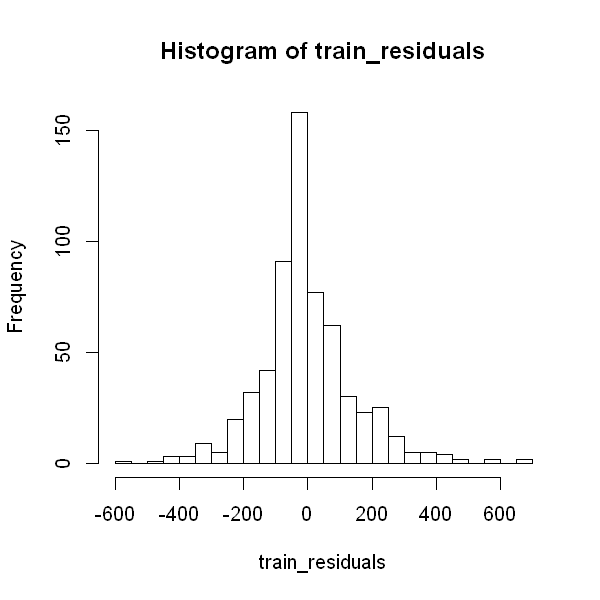

In [64]:
hist(train_residuals,breaks=40)

In [65]:
y_validation_hat = predict(forward.reg,validation)

In [66]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,63.64744,296.6739,189.6729,-10821.63,10856.77


In [67]:
validation_residuals = y_validation - y_validation_hat

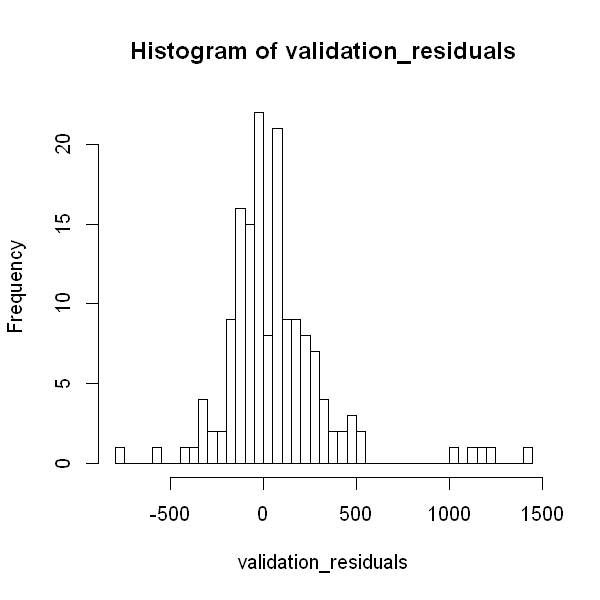

In [68]:
hist(validation_residuals,breaks=40)

In [70]:
backward.reg = step(lm(price ~ . ,data = train),direction='backward')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [71]:
summary(backward.reg)


Call:
lm(formula = price ~ cityabadan + citybandare_emam_khomeini + 
    citychamran + cityhandijan + citykhorramshahr + citymasjed_soleiman + 
    cityraamshir + cityshiban + area + building_age + skeleton_typebrick_or_cement_block + 
    skeleton_typeconcrete + postal_code191181 + postal_code613373 + 
    postal_code613388 + postal_code613664 + postal_code613682 + 
    postal_code613865 + postal_code614398 + postal_code614498 + 
    postal_code615167 + postal_code615468 + postal_code615568 + 
    postal_code615569 + postal_code615573 + postal_code615574 + 
    postal_code615896 + postal_code616388 + postal_code616395 + 
    postal_code616396 + postal_code616397 + postal_code616463 + 
    postal_code616464 + postal_code616478 + postal_code616571 + 
    postal_code618397 + postal_code618398 + postal_code618493 + 
    postal_code618761 + postal_code619587 + postal_code631454 + 
    postal_code631471 + postal_code631473 + postal_code631481 + 
    postal_code631483 + postal_code631494 + 

Warning message:
"not plotting observations with leverage one:
  7, 11, 13, 14, 21, 58, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 364, 369, 378, 385, 397, 400, 406, 416, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 527, 535, 537, 546, 552, 575, 581"

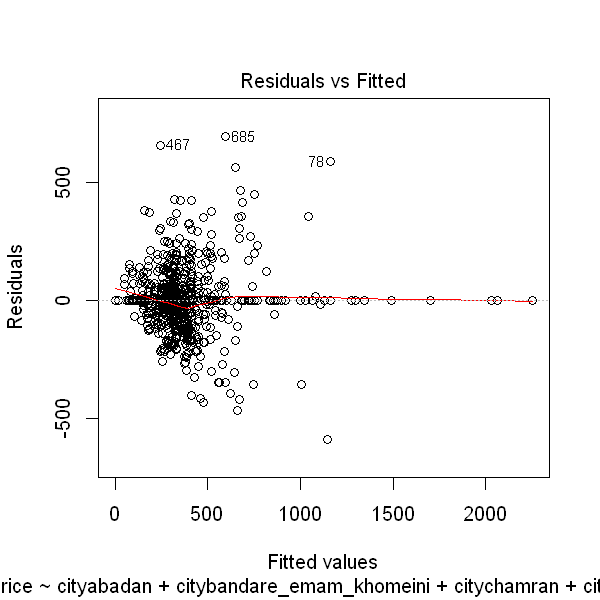

Warning message:
"not plotting observations with leverage one:
  7, 11, 13, 14, 21, 58, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 364, 369, 378, 385, 397, 400, 406, 416, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 527, 535, 537, 546, 552, 575, 581"

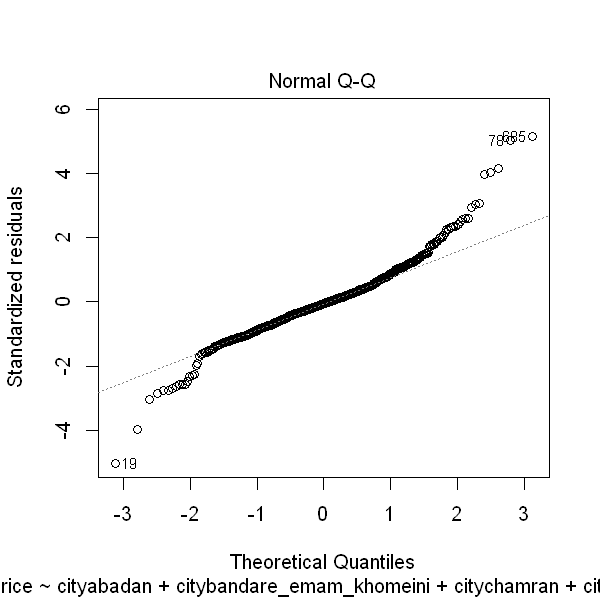

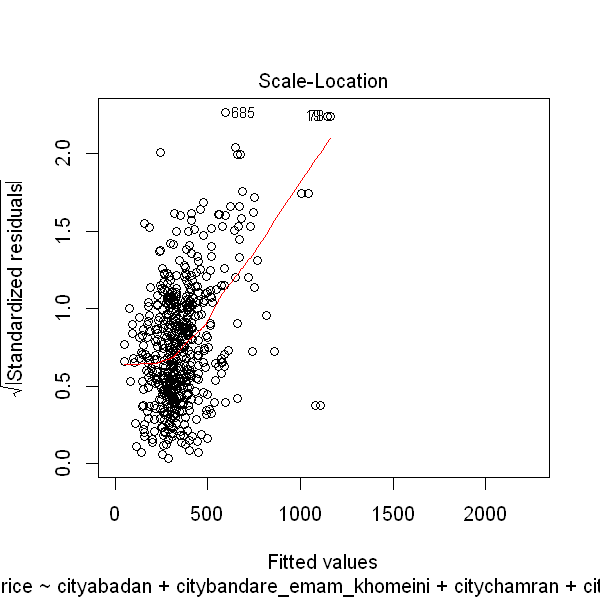

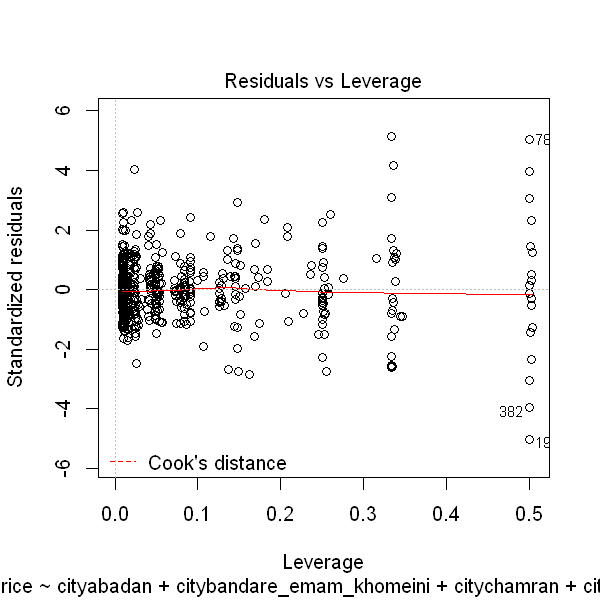

In [72]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(backward.reg)

In [73]:
accuracy(backward.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,-0.000000000000003610937,149.7751,104.3567,-2993.646,3013.738,0.5386261


In [74]:
y_train_hat = predict(backward.reg,train[-17])

In [75]:
train_residuals = train[,17] - y_train_hat

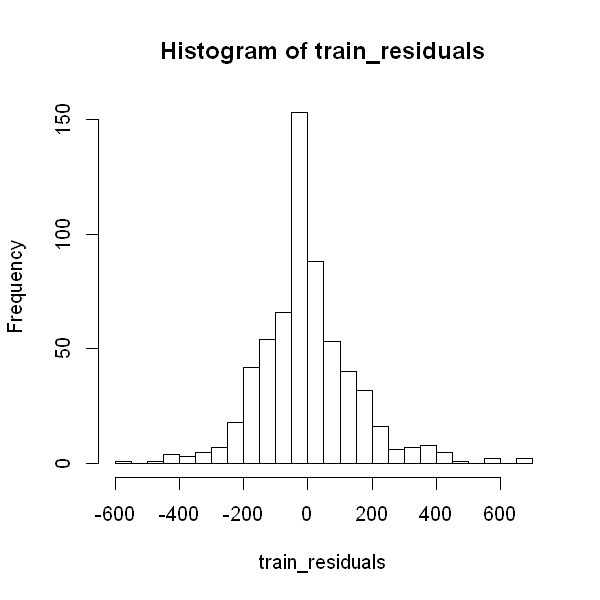

In [76]:
hist(train_residuals,breaks=40)

In [77]:
y_validation_hat = predict(backward.reg,validation)

In [78]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,59.59292,336.5469,210.0531,-11009.88,11050.56


In [79]:
validation_residuals = y_validation - y_validation_hat

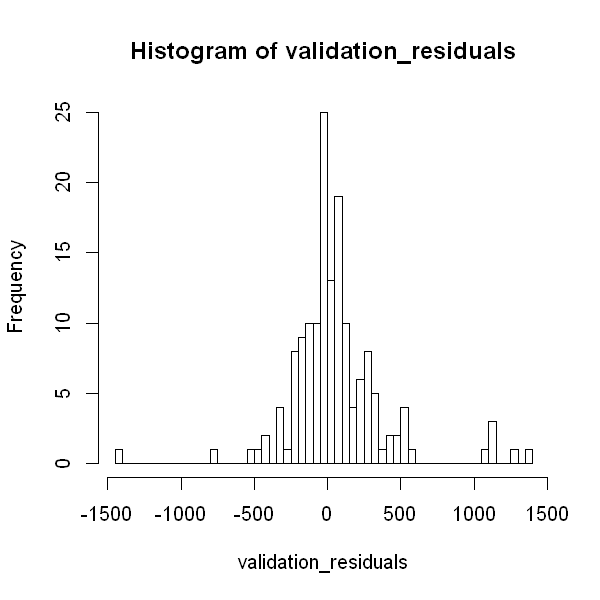

In [80]:
hist(validation_residuals,breaks=40)

In [81]:
stepwise.reg = step(lm(price ~ . ,data = train),direction='both')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
summary(stepwise.reg)


Call:
lm(formula = price ~ cityabadan + citybandare_emam_khomeini + 
    citychamran + cityhandijan + citymasjed_soleiman + cityraamshir + 
    cityshiban + area + building_age + skeleton_typebrick_or_cement_block + 
    skeleton_typeconcrete + postal_code191181 + postal_code613373 + 
    postal_code613388 + postal_code613664 + postal_code613674 + 
    postal_code613682 + postal_code613865 + postal_code614398 + 
    postal_code614498 + postal_code615167 + postal_code615468 + 
    postal_code615568 + postal_code615569 + postal_code615573 + 
    postal_code615574 + postal_code615896 + postal_code616388 + 
    postal_code616394 + postal_code616395 + postal_code616396 + 
    postal_code616397 + postal_code616463 + postal_code616464 + 
    postal_code616478 + postal_code616571 + postal_code618397 + 
    postal_code618398 + postal_code618493 + postal_code618761 + 
    postal_code619587 + postal_code631454 + postal_code631471 + 
    postal_code631473 + postal_code631481 + postal_code631483 +

Warning message:
"not plotting observations with leverage one:
  7, 11, 13, 14, 21, 22, 58, 61, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 351, 364, 369, 378, 385, 397, 400, 406, 416, 427, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 526, 527, 535, 537, 546, 552, 575, 581"

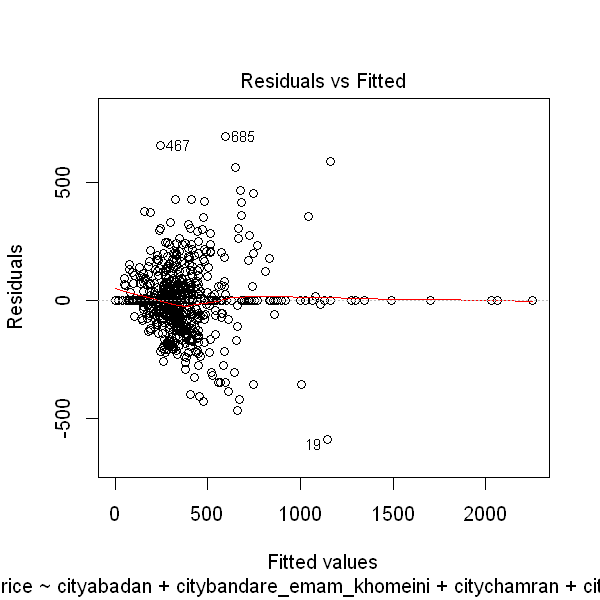

Warning message:
"not plotting observations with leverage one:
  7, 11, 13, 14, 21, 22, 58, 61, 62, 65, 67, 72, 76, 78, 81, 92, 109, 113, 124, 130, 135, 139, 149, 150, 159, 188, 206, 246, 253, 258, 261, 267, 293, 315, 327, 347, 349, 351, 364, 369, 378, 385, 397, 400, 406, 416, 427, 436, 448, 450, 451, 456, 465, 468, 474, 475, 488, 490, 512, 516, 526, 527, 535, 537, 546, 552, 575, 581"

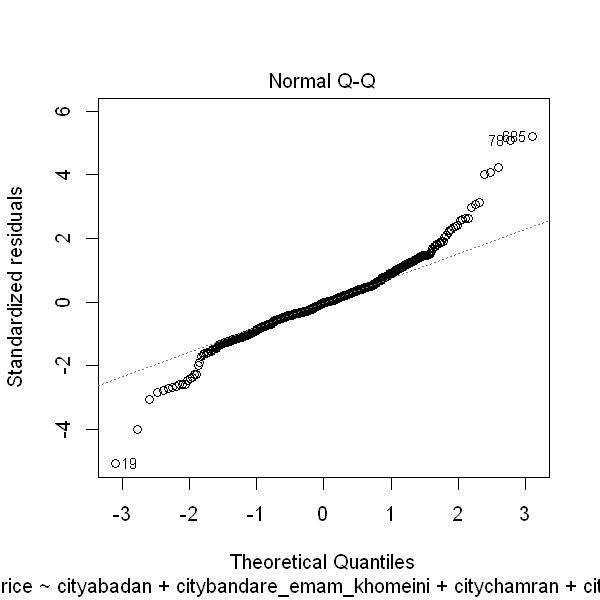

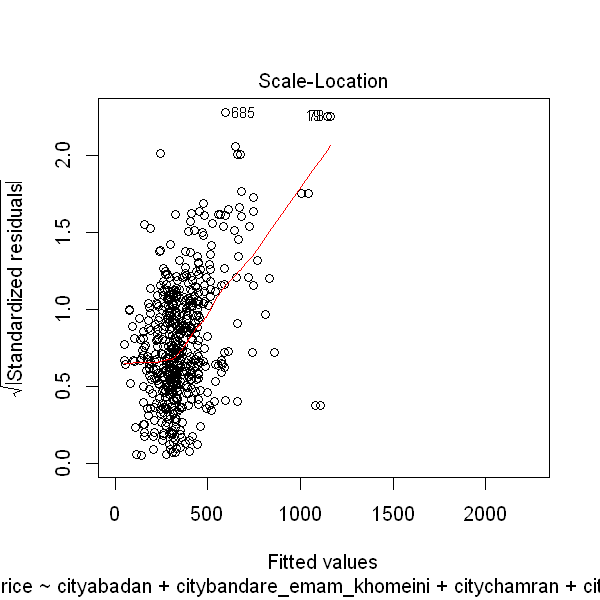

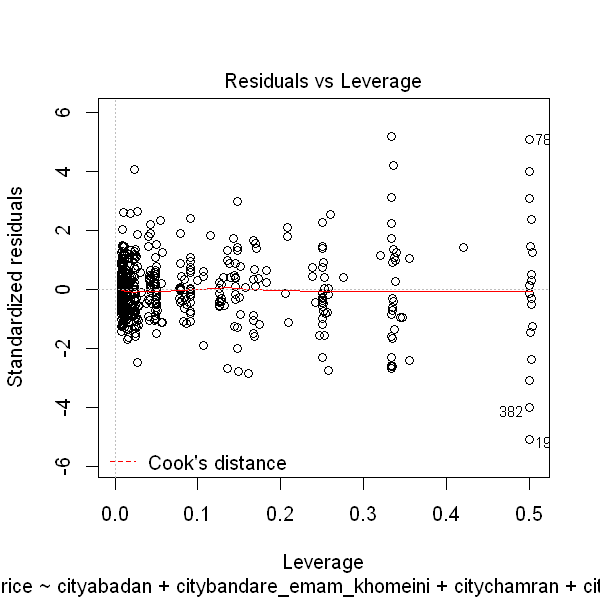

In [83]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(stepwise.reg)

In [84]:
accuracy(stepwise.reg)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,-0.00000000000000429018,147.634,102.7167,-2993.936,3013.852,0.5301617


In [85]:
y_train_hat = predict(stepwise.reg,train[-17])

In [86]:
train_residuals = train[,17] - y_train_hat

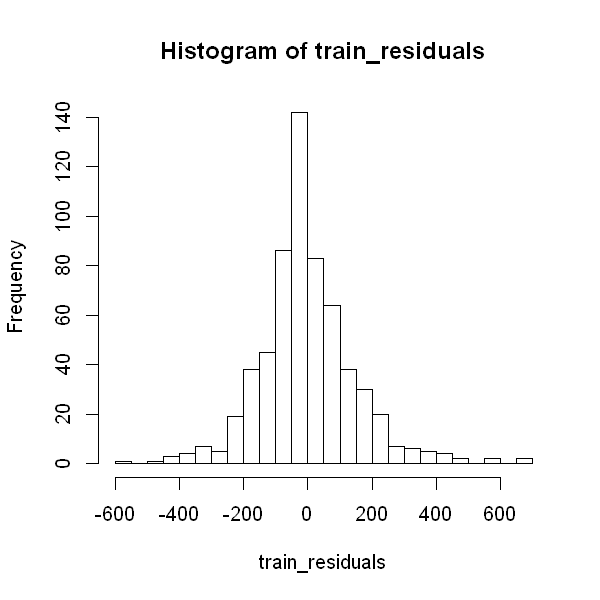

In [87]:
hist(train_residuals,breaks=40)

In [88]:
y_validation_hat = predict(stepwise.reg,validation)

In [89]:
accuracy(y_validation_hat , y_validation)

,ME,RMSE,MAE,MPE,MAPE
Test set,66.7623,336.73,209.9644,-10761.34,10803.69


In [90]:
validation_residuals = y_validation - y_validation_hat

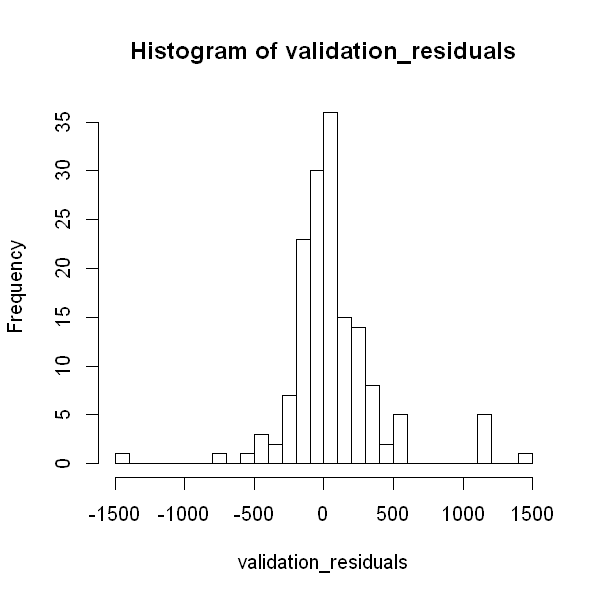

In [91]:
hist(validation_residuals,breaks=40)

In [34]:
# install.packages(leaps)

In [35]:
# library(leaps)

In [ ]:
exhaustive.reg = regsubsets(price ~ . ,data = train, nbest=1, nvmax = dim(train)[2], method = 'exhaustive',really.big=T)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"52  linear dependencies found"

In [ ]:
summary = summary(exhaustive.reg)

In [ ]:
summary$which

In [ ]:
summary$rsq

In [ ]:
summary$adjr2

In [ ]:
summary$Cp

In [532]:
all.reg <- lm(price ~ city + area + building_age + skeleton_type + postal_code ,data = train)
summary(all.reg)


Call:
lm(formula = price ~ city + area + building_age + skeleton_type + 
    postal_code, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-585.83  -55.53    0.00   39.27  677.86 

Coefficients: (11 not defined because of singularities)
                                       Estimate   Std. Error t value
(Intercept)                          356.419198   266.374061   1.338
cityahvaz                            -95.564862   263.084844  -0.363
citybandare_emam_khomeini            -16.443692   305.996781  -0.054
citybandare_mahshahr                 167.673098   263.641457   0.636
citybehbahan                         -44.234580   262.453706  -0.169
citychamran                          412.326803   348.004434   1.185
citydezfool                           82.011188   262.976120   0.312
cityhandijan                        1358.576697   264.256520   5.141
cityizeh                            -111.199399   263.641986  -0.422
citykhorramshahr                      30.280501   261.

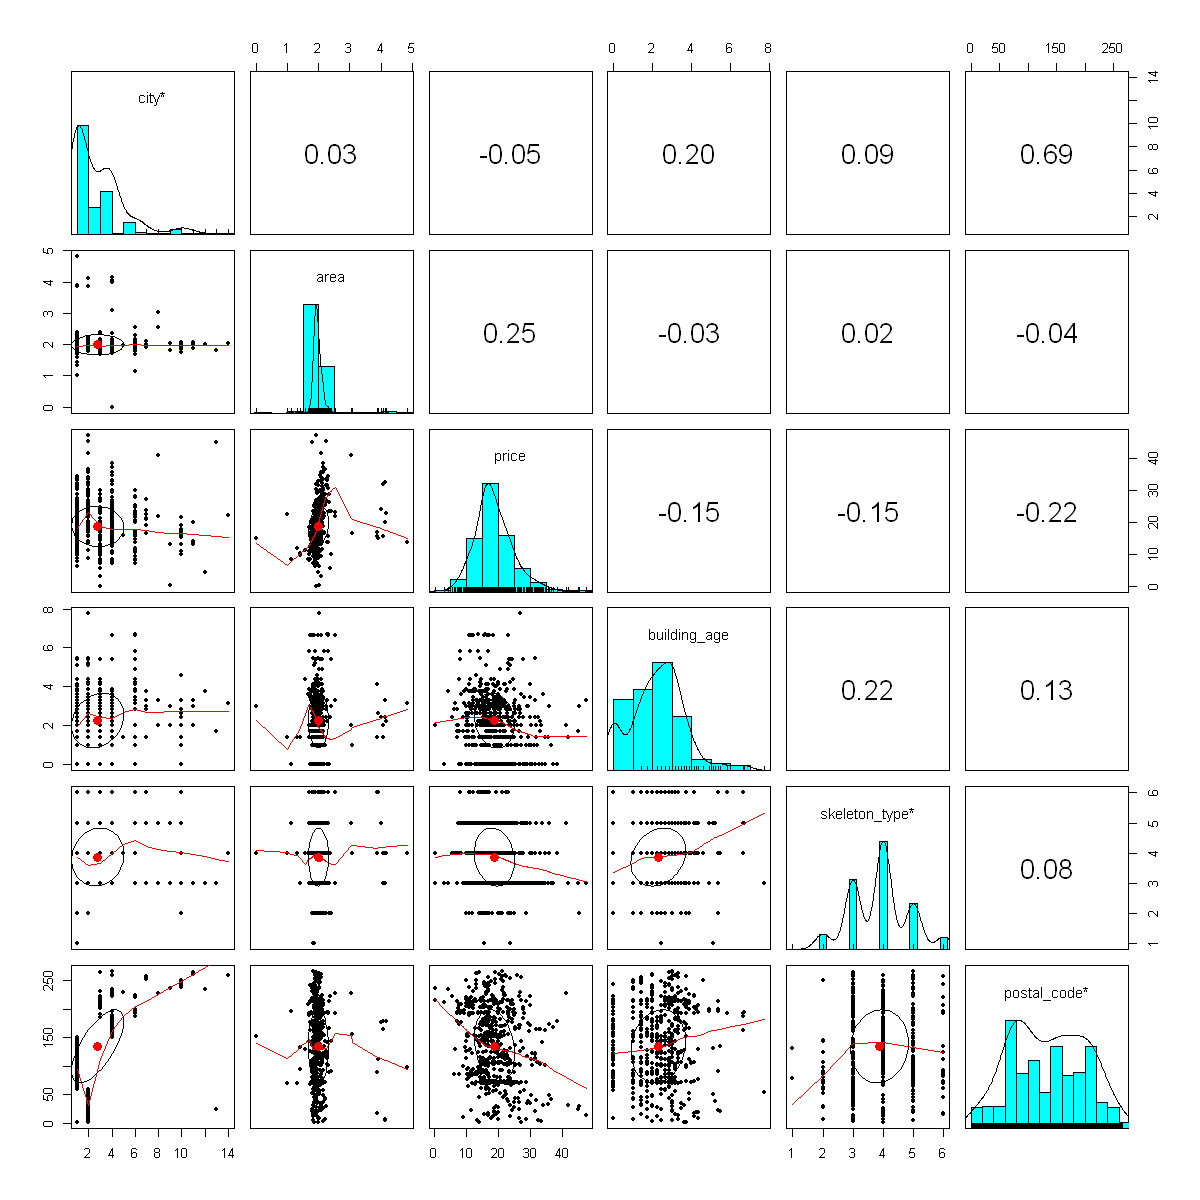

In [478]:
options(repr.plot.width = 10, repr.plot.height = 10)
train$building_age = sqrt(train$building_age)
train$price = sqrt(train$price)
train$area = log10(train$area)
pairs.panels(train, col="red")

In [479]:
all.reg.2 <- lm(price ~. ,data = train)
summary(all.reg.2)


Call:
lm(formula = price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.830  -1.233   0.000   1.161  14.224 

Coefficients: (11 not defined because of singularities)
                                     Estimate Std. Error t value     Pr(>|t|)
(Intercept)                          8.996979   6.603867   1.362      0.17398
cityahvaz                           -0.650406   6.266037  -0.104      0.91739
citybandare_emam_khomeini           -0.953476   7.287054  -0.131      0.89598
citybandare_mahshahr                 5.690964   6.278153   0.906      0.36533
citybehbahan                        -0.602913   6.252696  -0.096      0.92324
citychamran                         12.139664   8.295417   1.463      0.14428
citydezfool                          3.207395   6.266772   0.512      0.60912
cityhandijan                        19.040072   6.350186   2.998      0.00292
cityizeh                            -2.215108   6.278784  -0.353      0.72446
citykhorramshahr        

In [75]:
# summ(all.reg)

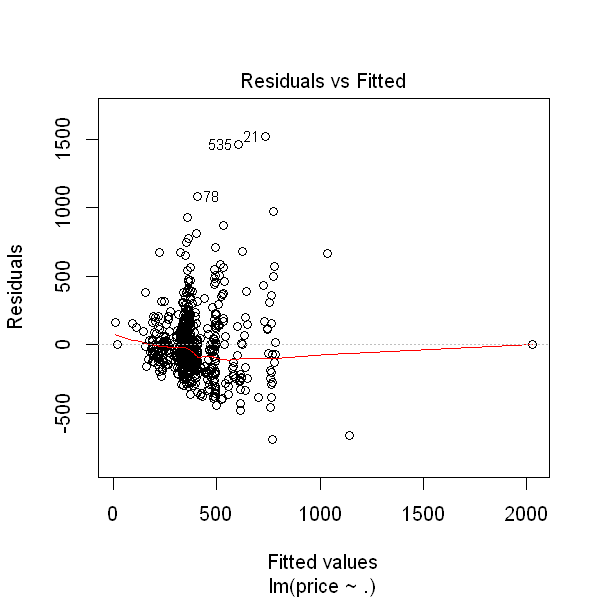

In [81]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg, which = 1)

Warning message:
"not plotting observations with leverage one:
  369, 427, 475, 496"

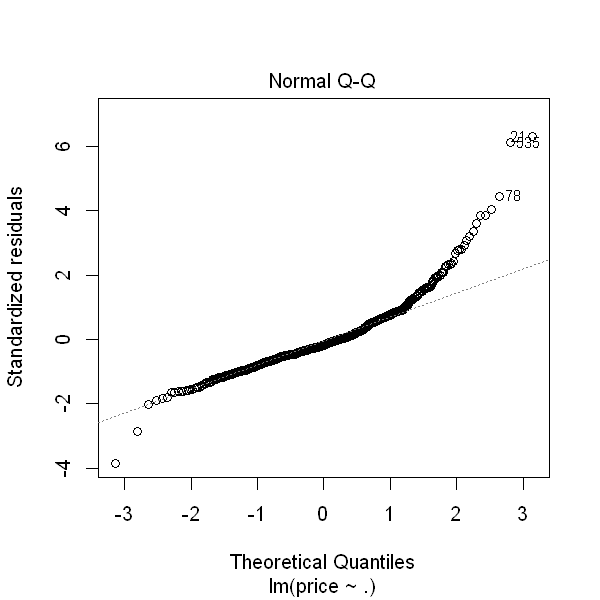

In [82]:
plot(all.reg, which = 2)

In [83]:
# all.reg

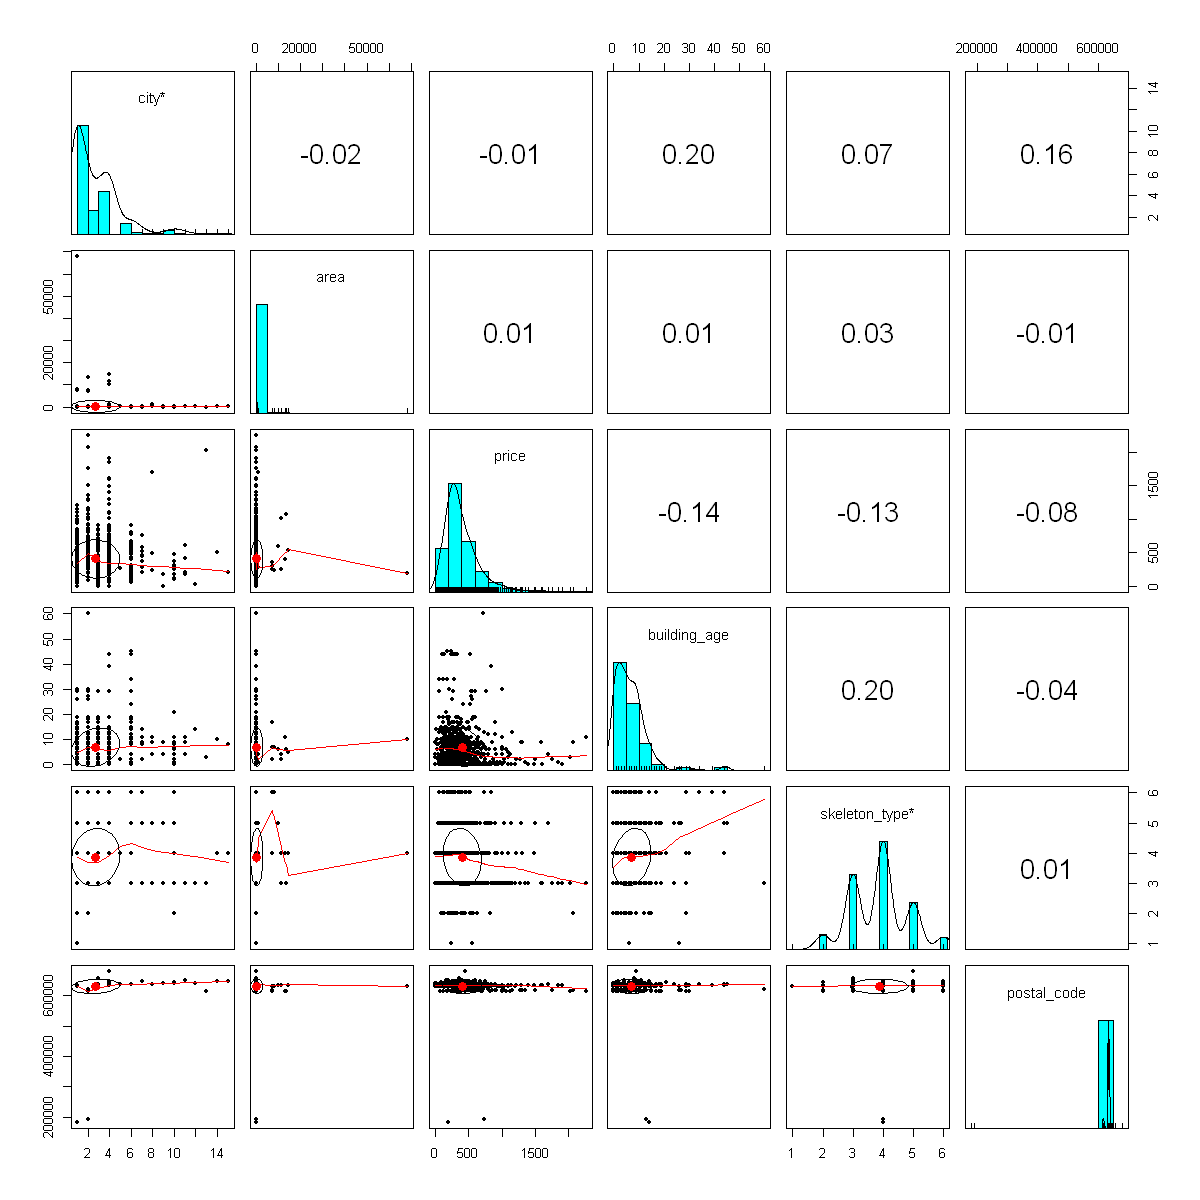

In [84]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(khoozestan, col="red")

In [ ]:
t

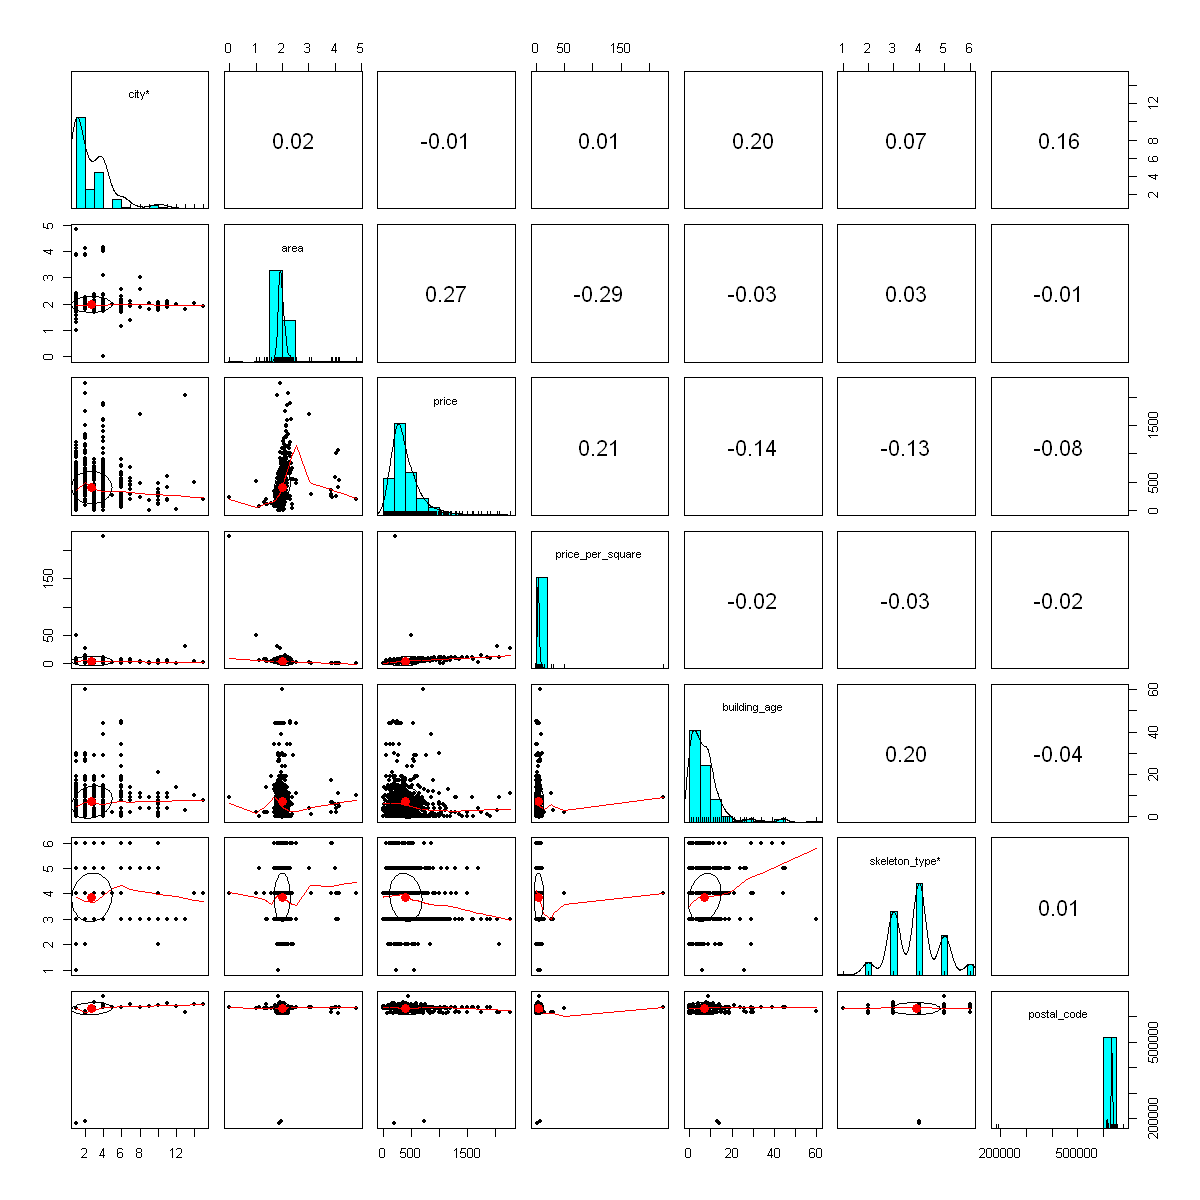

In [74]:
options(repr.plot.width = 10, repr.plot.height = 10)
khoozestan$area = log10(khoozestan$area)
pairs.panels(khoozestan, col="red")

In [75]:
all.reg.2 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.2)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-755.82 -141.38  -31.54   99.21 1596.59 

Coefficients:
                                       Estimate   Std. Error t value
(Intercept)                         141.1174952  317.0580268   0.445
cityahvaz                           210.2742974   33.1013661   6.352
citybandare_emam_khomeini          -108.4836588   30.8370006  -3.518
citybandare_mahshahr                 53.5450088   24.5472511   2.181
citybehbahan                       -104.0143274  250.0336715  -0.416
citychamran                          30.5730522   47.0166338   0.650
citydezfool                          77.3714118   90.1594757   0.858
cityhandijan                        301.2701032  146.1540445   2.061
cityizeh                           -319.2171407  177.2184373  -1.801
citykhorramshahr                    -95.2940128   64.0499114  -1.488
citymasjed_soleiman                -166.8240727  113.8838069  -

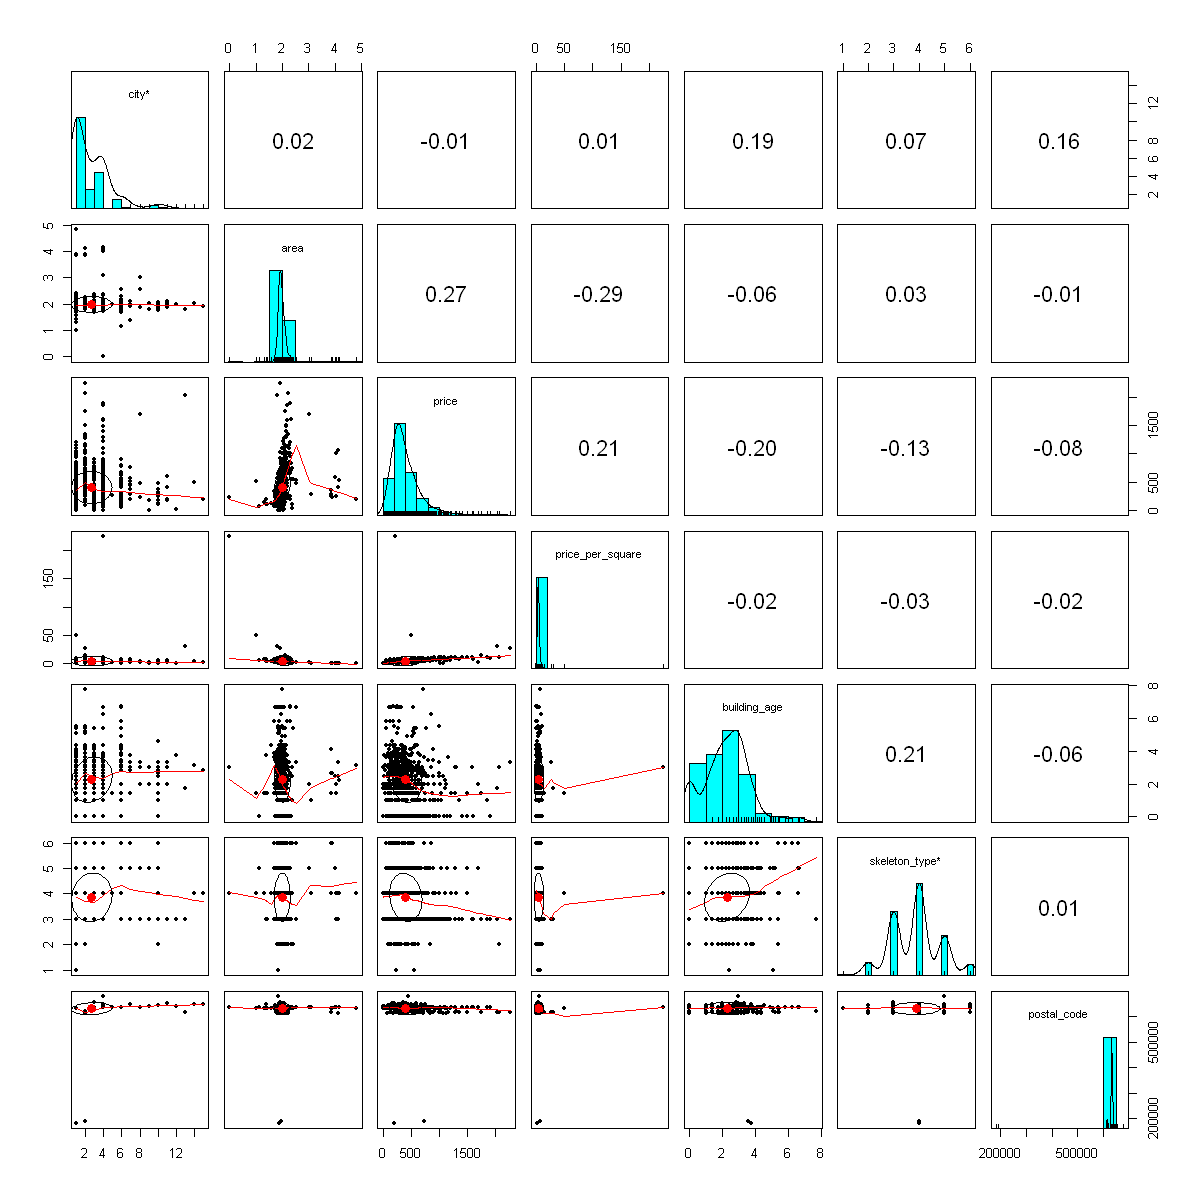

In [76]:
options(repr.plot.width = 10, repr.plot.height = 10)
khoozestan$building_age = sqrt(khoozestan$building_age)
pairs.panels(khoozestan, col="red")

In [77]:
all.reg.3 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.3)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-719.37 -134.46  -34.82  105.96 1615.36 

Coefficients:
                                       Estimate   Std. Error t value
(Intercept)                         237.5901364  314.5635595   0.755
cityahvaz                           225.9152131   32.9495056   6.856
citybandare_emam_khomeini          -103.6705742   30.4949591  -3.400
citybandare_mahshahr                 52.3622066   24.2942611   2.155
citybehbahan                       -120.0098528  247.5096117  -0.485
citychamran                          45.8545020   44.3357977   1.034
citydezfool                          99.1855896   89.4118633   1.109
cityhandijan                        329.6956894  144.8446821   2.276
cityizeh                           -297.8525443  175.4931827  -1.697
citykhorramshahr                    -94.2123003   63.3973587  -1.486
citymasjed_soleiman                -139.0512633  112.9424765  -

In [172]:
# options(repr.plot.width = 10, repr.plot.height = 10)
# khoozestan$price = log10(khoozestan$price)
# pairs.panels(khoozestan, col="red")

In [173]:
# all.reg.4 <- lm(price ~. -price_per_square ,data = khoozestan)
# summary(all.reg.4)

In [48]:
# options(repr.plot.width = 10, repr.plot.height = 10)
# khoozestan$postal_code = log10(khoozestan$postal_code)
# pairs.panels(khoozestan, col="red")

In [47]:
# all.reg.3.5 <- lm(price ~. -price_per_square ,data = khoozestan)
# summary(all.reg.3.5)

In [201]:
# summary(khoozestan)

In [200]:
# crPlots(all.reg.3)

In [78]:
# Eliminate extreme values
cutoff <- 4/((nrow(khoozestan)-length(all.reg.3$coefficients)-2)) # Cook's D plot, cutoff as 4/(n-k-1)

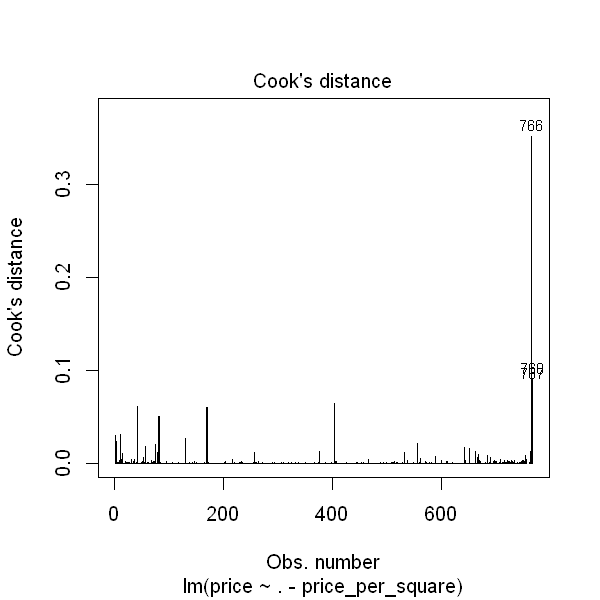

In [79]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.3, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  689, 757, 758, 759, 760"

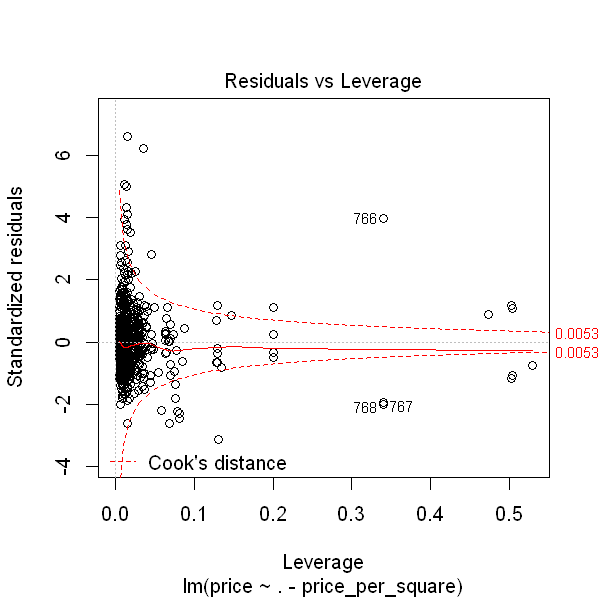

In [80]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.3, which=5, cook.levels=cutoff)

In [81]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("766", "767", "768")),] 

In [82]:
all.reg.4 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.4)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
   Min     1Q Median     3Q    Max 
-691.9 -135.8  -34.0  105.6 1611.1 

Coefficients:
                                       Estimate   Std. Error t value
(Intercept)                         251.0953768  311.6956739   0.806
cityahvaz                           225.9896601   32.6470305   6.922
citybandare_emam_khomeini          -105.6270301   30.2219837  -3.495
citybandare_mahshahr                 52.7744705   24.0700265   2.193
citybehbahan                       -119.3174189  245.2210973  -0.487
citychamran                          45.5825058   43.9259077   1.038
citydezfool                          98.3536666   88.5857610   1.110
cityizeh                           -298.6718671  173.8706766  -1.718
citykhorramshahr                    -94.9254268   62.8114228  -1.511
citymasjed_soleiman                -142.0567458  111.9066746  -1.269
cityraamshir                       -395.3671735  245.9532201  -1.607
city

In [83]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.4$coefficients)-2))

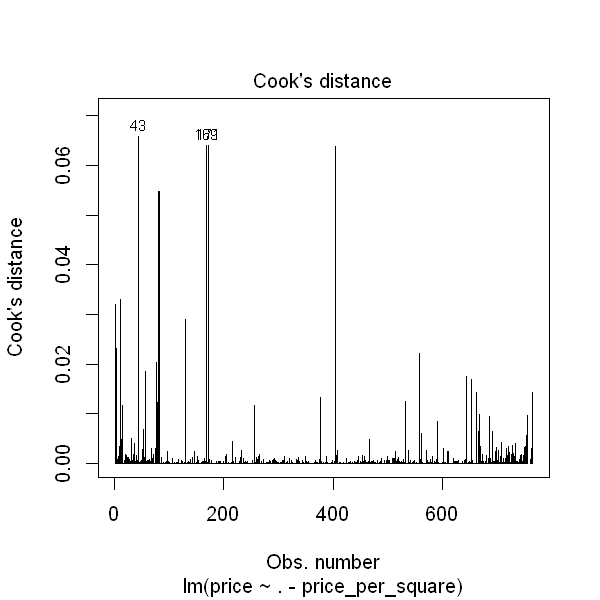

In [84]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.4, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  689, 757, 758, 759, 760"

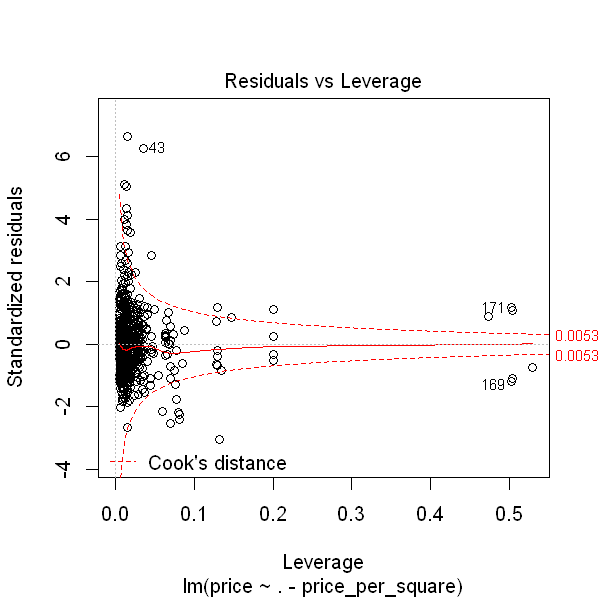

In [85]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.4, which=5, cook.levels=cutoff)

In [86]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("43", "169", "171")),] 

In [87]:
all.reg.5 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.5)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-679.16 -132.66  -32.49  105.94 1627.47 

Coefficients:
                                Estimate   Std. Error t value        Pr(>|t|)
(Intercept)                   58.6308291  253.9710694   0.231        0.817490
cityahvaz                    206.0101697   31.9392311   6.450 0.0000000002017
citybandare_emam_khomeini   -109.6017873   29.4266692  -3.725        0.000211
citybandare_mahshahr          49.5991704   23.4357366   2.116        0.034644
citybehbahan                -123.2095077  238.7071612  -0.516        0.605901
citychamran                   44.7000821   42.7704444   1.045        0.296310
citydezfool                   94.8597912   86.2354829   1.100        0.271686
cityizeh                    -302.6581133  169.2531426  -1.788        0.074153
citykhorramshahr             -96.2946259   61.1430803  -1.575        0.115705
citymasjed_soleiman         -145.3220565  

In [88]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.5$coefficients)-2))

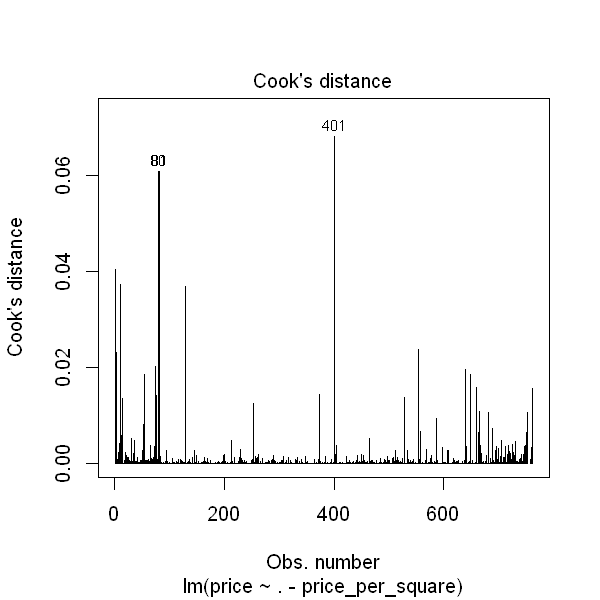

In [89]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.5, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  686, 754, 755, 756, 757"

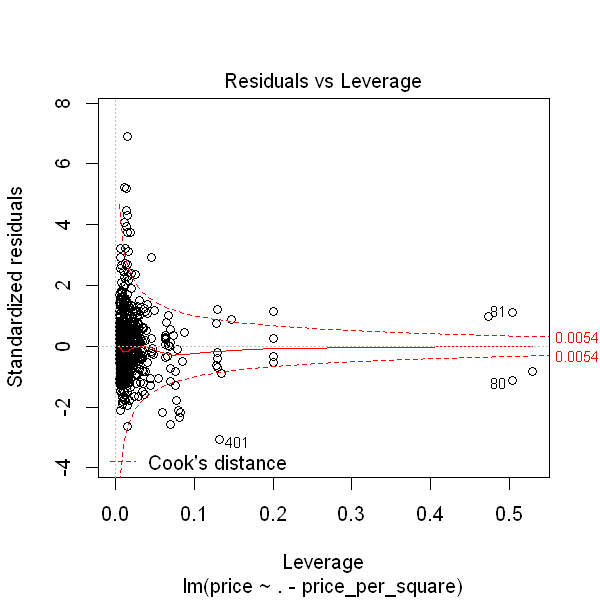

In [90]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.5, which=5, cook.levels=cutoff)

In [91]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("80", "81", "401")),] 

In [92]:
all.reg.6 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.6)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-661.63 -129.44  -34.17  102.29 1631.52 

Coefficients:
                                Estimate   Std. Error t value          Pr(>|t|)
(Intercept)                  -15.2215826  253.5806186  -0.060          0.952151
cityahvaz                    200.0204304   31.8088394   6.288 0.000000000549232
citybandare_emam_khomeini   -111.6632451   29.2613435  -3.816          0.000147
citybandare_mahshahr          44.8112214   23.3481497   1.919          0.055336
citybehbahan                -126.6347549  237.3026987  -0.534          0.593750
citychamran                   38.7394634   42.5754441   0.910          0.363171
citydezfool                   95.1798324   85.7282231   1.110          0.267252
citykhorramshahr             -97.2629890   60.7835042  -1.600          0.109992
citymasjed_soleiman         -149.8963683  108.3041373  -1.384          0.166767
cityraamshir          

In [93]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.6$coefficients)-2))

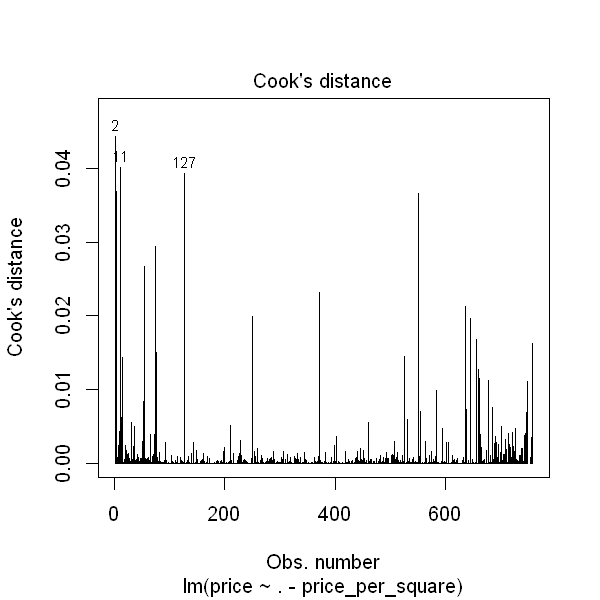

In [94]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.6, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  683, 751, 752, 753, 754"

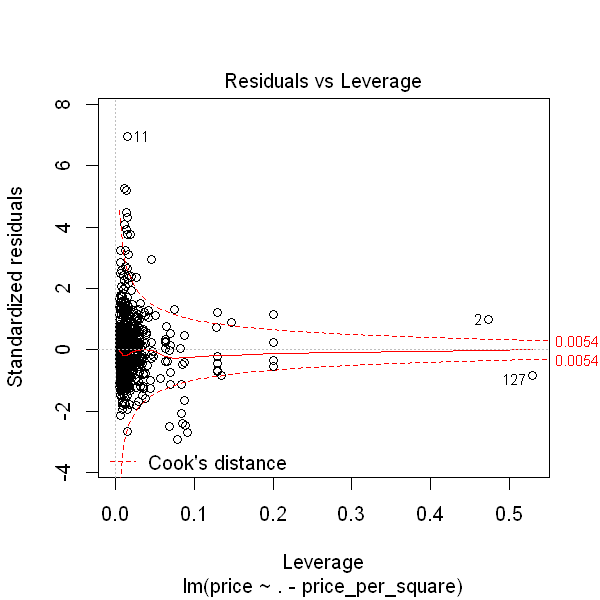

In [95]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.6, which=5, cook.levels=cutoff)

In [96]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("2", "11", "127")),] 

In [97]:
all.reg.7 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.7)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-675.60 -127.14  -33.71   98.34 1240.63 

Coefficients:
                                Estimate   Std. Error t value
(Intercept)                 -3516.048244  2758.188223  -1.275
cityahvaz                     264.735895    74.819567   3.538
citybandare_emam_khomeini    -131.599969    33.505767  -3.928
citybandare_mahshahr           21.920154    28.509597   0.769
citybehbahan                 -155.293002   230.399184  -0.674
citychamran                    20.620501    43.894590   0.470
citydezfool                    17.757279   103.339682   0.172
citykhorramshahr             -153.521721    73.431872  -2.091
citymasjed_soleiman          -240.010891   129.098691  -1.859
cityraamshir                 -433.588501   232.068504  -1.868
cityshiban                   1671.006247   241.311036   6.925
cityshoosh                     76.458725   240.157062   0.318
cityshooshtar   

In [99]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.7$coefficients)-2))

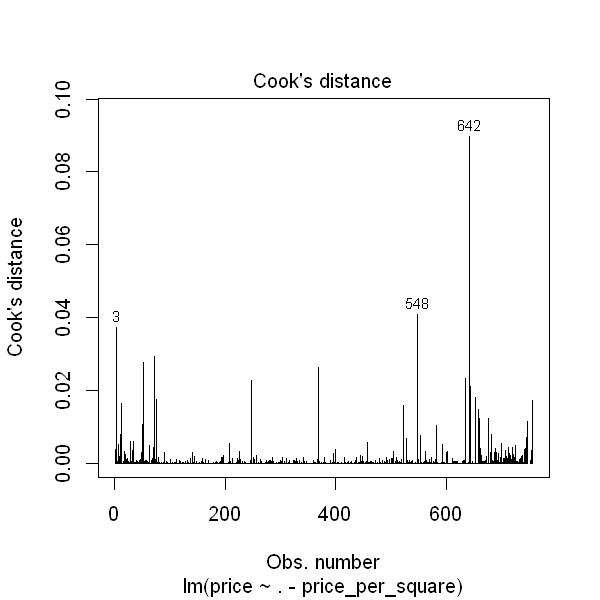

In [100]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.7, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  680, 748, 749, 750, 751"

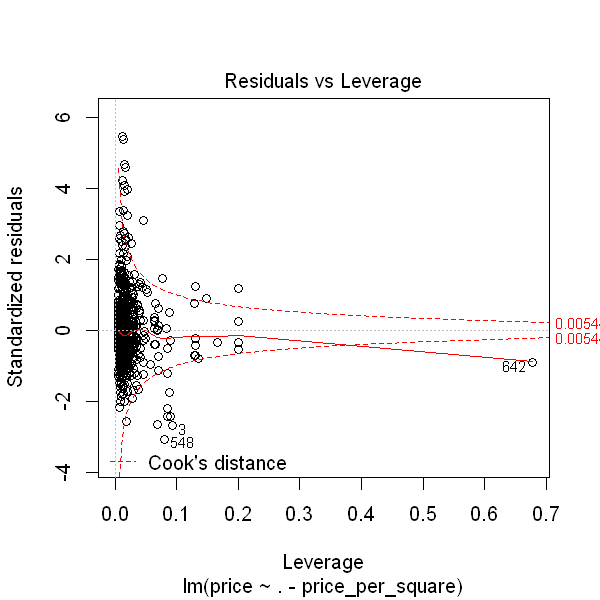

In [101]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.7, which=5, cook.levels=cutoff)

In [102]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("3", "548", "642")),] 

In [103]:
all.reg.8 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.8)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-696.31 -125.88  -32.49   96.73 1232.38 

Coefficients:
                                Estimate   Std. Error t value
(Intercept)                 -6813.397259  4777.801443  -1.426
cityahvaz                     347.909611   121.775038   2.857
citybandare_emam_khomeini    -150.355876    41.752451  -3.601
citybandare_mahshahr            4.384315    35.793808   0.122
citybehbahan                 -182.126262   229.635737  -0.793
citychamran                    -2.153687    49.427750  -0.044
citydezfool                   -50.128419   136.110950  -0.368
citykhorramshahr             -202.857930    95.957452  -2.114
citymasjed_soleiman          -327.346839   167.224725  -1.958
cityraamshir                 -468.378171   233.539934  -2.006
cityshiban                   1768.462432   260.951422   6.777
cityshoosh                    -13.160173   257.757983  -0.051
cityshooshtar   

In [104]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.8$coefficients)-2))

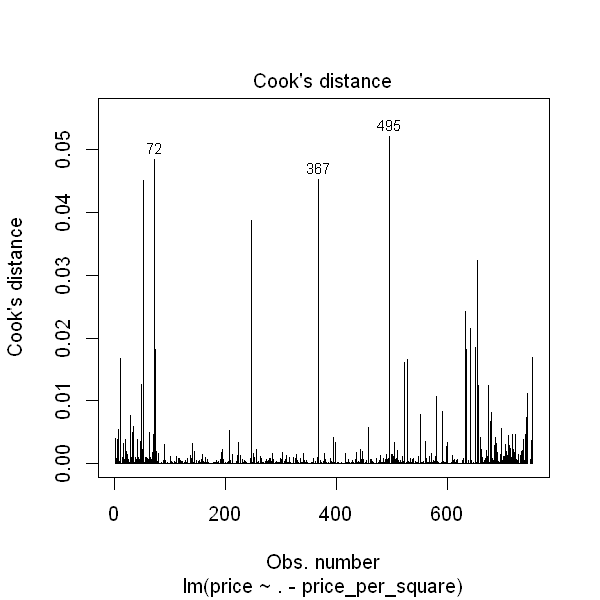

In [105]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.8, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  677, 745, 746, 747, 748"

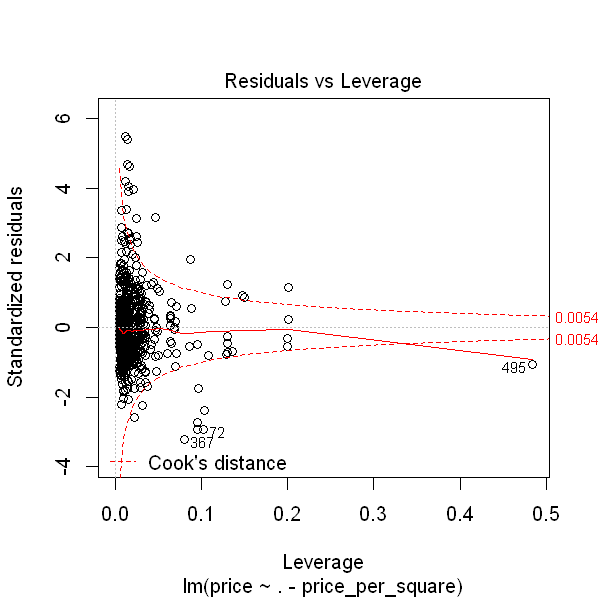

In [106]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.8, which=5, cook.levels=cutoff)

In [107]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("72", "367", "495")),] 

In [108]:
all.reg.9 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.9)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-751.06 -122.76  -31.44   89.37 1227.99 

Coefficients:
                                Estimate   Std. Error t value
(Intercept)                 -10684.16877   6548.49016  -1.632
cityahvaz                      443.85451    164.00516   2.706
citybandare_emam_khomeini     -171.81197     49.06543  -3.502
citybandare_mahshahr           -22.99474     44.18492  -0.520
citybehbahan                  -213.75894    229.13151  -0.933
citychamran                    -33.52849     55.88383  -0.600
citydezfool                   -134.91653    169.88287  -0.794
citykhorramshahr              -263.43981    119.42320  -2.206
citymasjed_soleiman           -433.11110    207.72127  -2.085
cityraamshir                  -512.68413    236.18108  -2.171
cityshiban                    1879.50055    284.76490   6.600
cityshoosh                    -118.96352    279.74005  -0.425
cityshooshtar   

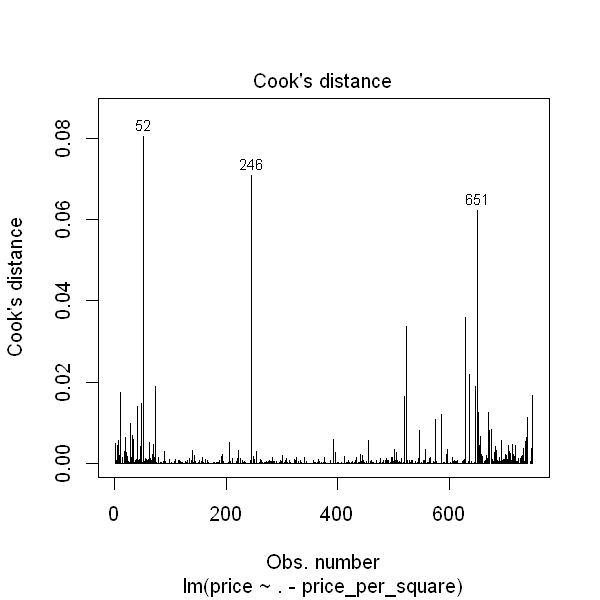

In [109]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.9$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.9, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  674, 742, 743, 744, 745"

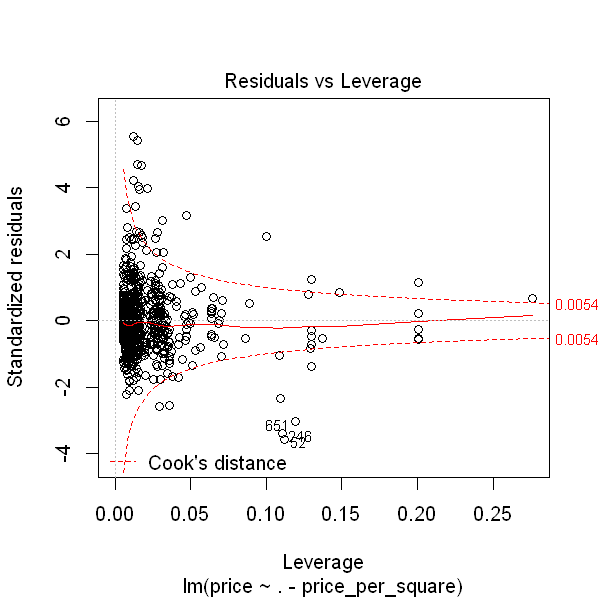

In [110]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.9, which=5, cook.levels=cutoff)

In [111]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("52", "248", "651")),] 

all.reg.10 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.10)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-883.95 -123.53  -28.34   88.99 1214.46 

Coefficients:
                                Estimate   Std. Error t value
(Intercept)                 -11018.86362   6451.75707  -1.708
cityahvaz                      457.48013    161.56066   2.832
citybandare_emam_khomeini     -169.01032     48.34808  -3.496
citybandare_mahshahr           -22.44111     43.54024  -0.515
citybehbahan                  -216.88571    225.67570  -0.961
citychamran                    -42.86557     55.09248  -0.778
citydezfool                   -134.43623    167.34611  -0.803
citykhorramshahr              -263.24040    117.65175  -2.237
citymasjed_soleiman           -436.49195    204.63676  -2.133
cityraamshir                  -513.47111    232.61935  -2.207
cityshiban                    1902.22037    280.52585   6.781
cityshoosh                    -131.72583    275.57231  -0.478
cityshooshtar   

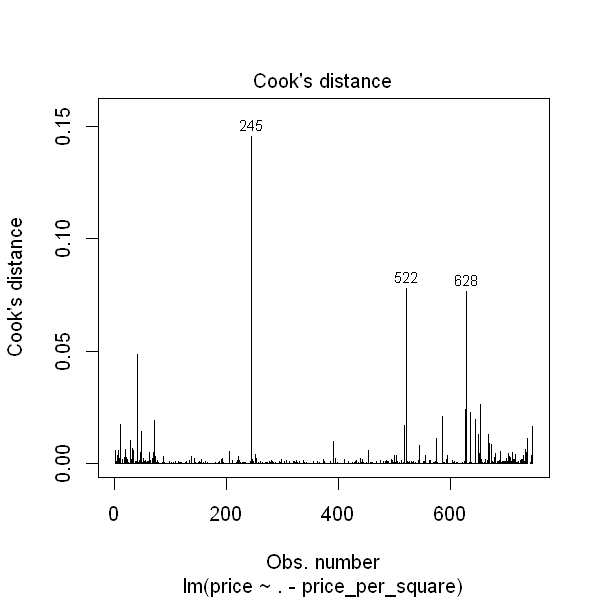

In [112]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.10$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.10, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  671, 739, 740, 741, 742"

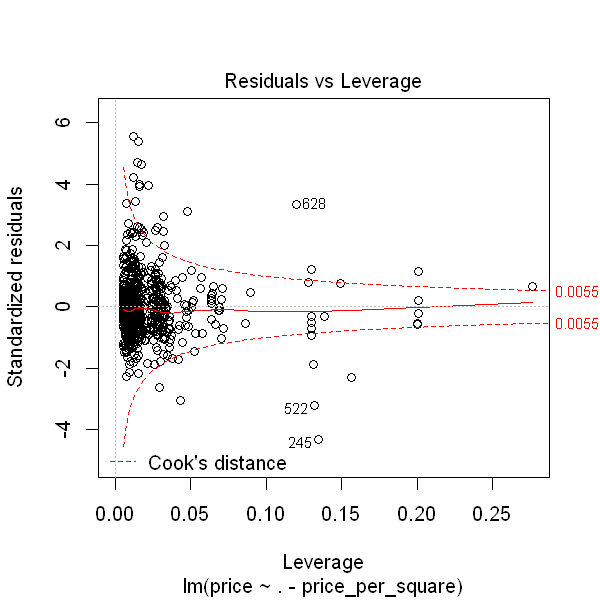

In [113]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.10, which=5, cook.levels=cutoff)

In [114]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("245", "522", "628")),] 

all.reg.11 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.11)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-864.13 -118.22  -24.12   84.28 1186.44 

Coefficients:
                                 Estimate    Std. Error t value
(Intercept)                 -13607.048351   6233.068295  -2.183
cityahvaz                      499.701464    155.953524   3.204
citybandare_emam_khomeini     -179.400628     46.664472  -3.844
citybandare_mahshahr           -44.151081     42.167016  -1.047
citybehbahan                  -235.534329    217.694645  -1.082
citychamran                    -87.876443     53.472706  -1.643
citydezfool                   -185.654093    161.567263  -1.149
citykhorramshahr              -294.327483    113.571084  -2.592
citymasjed_soleiman           -504.703704    197.605812  -2.554
cityraamshir                  -547.639471    224.421909  -2.440
cityshiban                    1995.788924    270.872281   7.368
cityshoosh                    -209.130723    266.01237

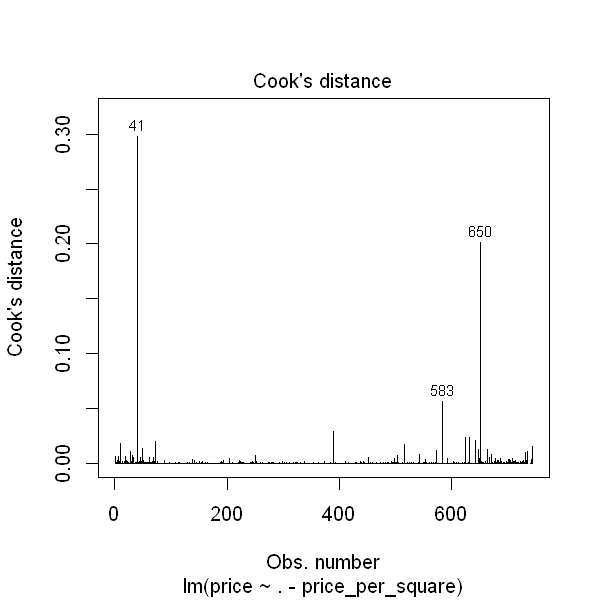

In [115]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.11$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  668, 736, 737, 738, 739"

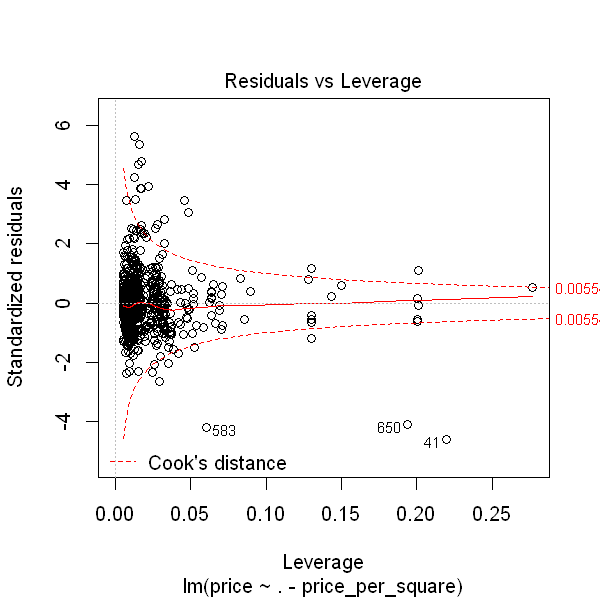

In [116]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.11, which=5, cook.levels=cutoff)

In [117]:
khoozestan <- khoozestan[-which(rownames(khoozestan)    # Row names discovered in 2 rounds
    %in% c("41", "583", "650")),] 

all.reg.12 <- lm(price ~. -price_per_square ,data = khoozestan)
summary(all.reg.12)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-646.59 -112.16  -12.21   85.58 1106.84 

Coefficients:
                                 Estimate    Std. Error t value
(Intercept)                 -11205.837031   5913.506942  -1.895
cityahvaz                      427.371185    147.849668   2.891
citybandare_emam_khomeini     -157.813309     44.232505  -3.568
citybandare_mahshahr           -22.588262     39.918091  -0.566
citybehbahan                  -218.165130    205.564095  -1.061
citychamran                   -111.422450     50.639666  -2.200
citydezfool                   -104.528028    153.258999  -0.682
citykhorramshahr              -233.611248    107.753142  -2.168
citymasjed_soleiman           -440.317978    187.239911  -2.352
cityraamshir                  -538.048945    211.951730  -2.539
cityshiban                    1965.867467    256.122775   7.675
cityshoosh                    -167.024569    251.52184

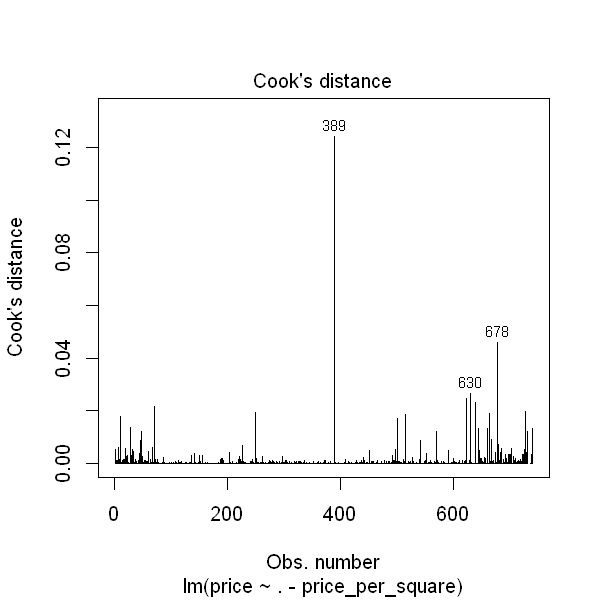

In [119]:
cutoff <- 4/((nrow(khoozestan)-length(all.reg.12$coefficients)-2))
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.12, which=4, cook.levels=cutoff)                        # identify D values > cutoff

Warning message:
"not plotting observations with leverage one:
  665, 733, 734, 735, 736"

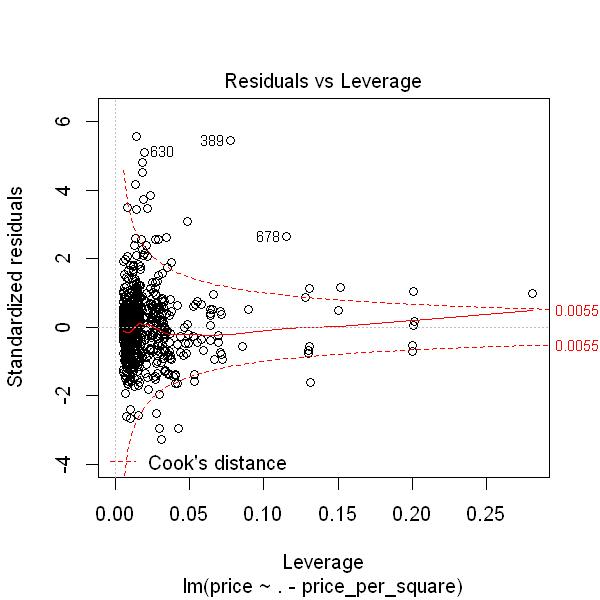

In [120]:
options(repr.plot.width = 5, repr.plot.height = 5)
plot(all.reg.12, which=5, cook.levels=cutoff)

Warning message:
"not plotting observations with leverage one:
  665, 733, 734, 735, 736"

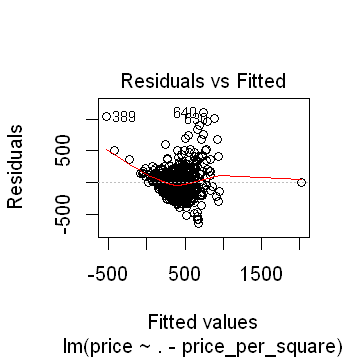

Warning message:
"not plotting observations with leverage one:
  665, 733, 734, 735, 736"

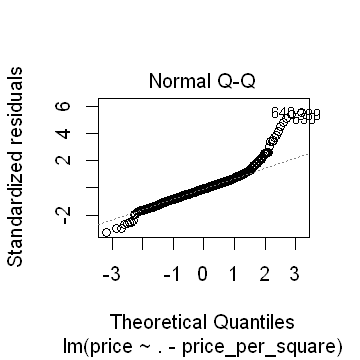

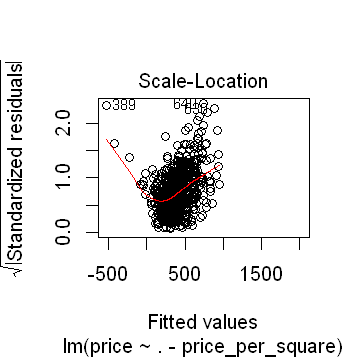

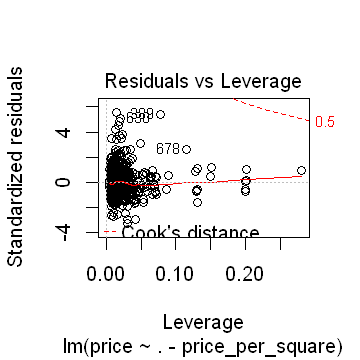

In [122]:
options(repr.plot.width = 3, repr.plot.height = 3)
plot(all.reg.12)

In [191]:
all.reg.3$coefficients

(Intercept)                          cityahvaz 
                    237.5901363669                     225.9152131007 
         citybandare_emam_khomeini               citybandare_mahshahr 
                   -103.6705742076                      52.3622066169 
                      citybehbahan                        citychamran 
                   -120.0098528391                      45.8545020107 
                       citydezfool                       cityhandijan 
                     99.1855895836                     329.6956894484 
                          cityizeh                   citykhorramshahr 
                   -297.8525443346                     -94.2123003013 
               citymasjed_soleiman                       cityraamshir 
                   -139.0512632933                    -391.5508066546 
                        cityshiban                         cityshoosh 
                   1578.0236276527                     175.4793665468 
                     cityshooshtar                               area 
                   -111.6274478035                     207.6745488506 
                      building_age skeleton_typebrick_or_cement_block 
                    -37.8477351764                    -186.0390140344 
             skeleton_typeconcrete                 skeleton_typemetal 
                    -22.6024132348                    -137.9143127563 
       skeleton_typemetal_concrete                  skeleton_typenone 
                   -139.1689924429                    -213.3530724933 
                       postal_code 
                     -0.0001208252

In [189]:
-length(all.reg.3$coefficients)-2

[1] -25

In [64]:
all.reg.2 <- lm(price ~. -price_per_square ,data = khoozestan)

In [65]:
summary(all.reg.2)


Call:
lm(formula = price ~ . - price_per_square, data = khoozestan)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1164 -0.1156  0.0235  0.1830  1.6916 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                         2.559540   2.907227   0.880
cityahvaz                           0.178302   0.048020   3.713
citybandare_emam_khomeini          -0.205835   0.045424  -4.531
citybandare_mahshahr                0.022349   0.036118   0.619
citybehbahan                       -0.074928   0.368828  -0.203
citychamran                        -0.050331   0.069315  -0.726
citydezfool                         0.116565   0.132810   0.878
cityhandijan                        0.121390   0.215592   0.563
cityizeh                           -1.916197   0.261402  -7.330
citykhorramshahr                   -0.109214   0.094321  -1.158
citymasjed_soleiman                -0.155152   0.167771  -0.925
cityraamshir                       -1.268301   0.36976